# Blockchain Tutorial (Python)

![image](https://www.investopedia.com/thmb/pzT2wbISy-wNtMypVlBjr39dydg=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/Blockchain_final-086b5b7b9ef74ecf9f20fe627dba1e34.png)

## Start

I want to give credits to [this repo](https://github.com/demining/Simple-Python-Blockchain-Google-Colab) with [this video](https://youtu.be/b81Ib_oYbFk?si=VEnNTD4aEfZkuL57) as explanation.

This notebook is an adaption of the original author's work.

In [2]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [3]:
# !git clone https://github.com/yiqiao-yin/Simple-Python-Blockchain-Google-Colab.git

## Library

In [4]:
# cd Simple-Python-Blockchain-Google-Colab/

In [5]:
# ! python ipynob.py

In [6]:
import sys
# import ipynob
# import ipynumpy

## Define `extended_gcd`



Here's the given function with added comments and type hints for better understanding and clarity:

```python
def extended_gcd(aa: int, bb: int) -> tuple[int, int, int]:
    """
    Calculate the Extended Greatest Common Divisor of two numbers.
    
    The Extended Euclidean Algorithm finds not only the greatest common divisor (GCD)
    of two integers a and b, but also the coefficients of Bézout's identity, which are
    integers x and y such that ax + by = gcd(a, b).

    :param aa: First integer
    :param bb: Second integer
    :return: A tuple containing the GCD of aa and bb, and the Bézout coefficients x and y.
    """
    # Initialize the remainders and the Bézout coefficients
    lastremainder, remainder = abs(aa), abs(bb)
    x, lastx, y, lasty = 0, 1, 1, 0

    # Loop until the remainder is 0, indicating the end of the algorithm
    while remainder:
        # Update the remainder and calculate the quotient
        lastremainder, (quotient, remainder) = remainder, divmod(lastremainder, remainder)

        # Update Bézout coefficients for aa
        x, lastx = lastx - quotient*x, x

        # Update Bézout coefficients for bb
        y, lasty = lasty - quotient*y, y

    # Adjust the sign of Bézout coefficients based on the input integers' signs
    # and return the GCD along with the Bézout coefficients
    return lastremainder, lastx * (-1 if aa < 0 else 1), lasty * (-1 if bb < 0 else 1)
```

### Explanation

This function is an implementation of the Extended Euclidean Algorithm. It is designed to calculate not only the Greatest Common Divisor (GCD) of two integers `a` and `b`, but also to find integers `x` and `y` (the Bézout coefficients) such that `a*x + b*y = gcd(a, b)`. Here's a breakdown of how it works:

1. **Initialization**: The function starts by taking the absolute values of the inputs `aa` and `bb` to handle both positive and negative integers. It also initializes four variables, `x`, `lastx`, `y`, and `lasty`, which are used to calculate the Bézout coefficients.

2. **While Loop**: The core of the algorithm is a while loop that runs as long as `remainder` is not zero. Inside this loop:
    - It uses `divmod` to simultaneously update `lastremainder` to the current `remainder` and calculate a new `remainder` and a `quotient` from the division of `lastremainder` by the current `remainder`.
    - It updates the Bézout coefficients `x` and `y` using the `quotient` calculated from the division.

3. **Return**: Once the remainder reaches zero, the loop ends, and the function adjusts the signs of `x` and `y` based on the signs of the input integers. Finally, it returns a tuple containing the GCD of `aa` and `bb`, and the Bézout coefficients `x` and `y`.

This implementation is particularly useful in fields such as cryptography, where finding the multiplicative inverse of a number modulo n (which is a special case of the Bézout coefficients) is a common task.

In [7]:
def extended_gcd(aa: int, bb: int) -> tuple[int, int, int]:
    """
    Computes the greatest common divisor of two integers along with the coefficients of Bézout's identity.

    :param aa: First integer
    :param bb: Second integer
    :return: A tuple containing three integers: the gcd of `aa` and `bb`, and the coefficients x and y of Bézout's identity (ax + by = gcd(a, b)).
    """
    # Initialize variables
    lastremainder, remainder = abs(aa), abs(bb)  # Use absolute values to handle negative inputs
    x, lastx, y, lasty = 0, 1, 1, 0  # Initialize Bézout coefficients

    # Loop until the remainder is 0
    while remainder:
        # Perform division and update remainders and quotient
        lastremainder, (quotient, remainder) = remainder, divmod(lastremainder, remainder)

        # Update x and y using the quotient
        x, lastx = lastx - quotient * x, x  # Update x
        y, lasty = lasty - quotient * y, y  # Update y

    # Adjust the sign of lastx and lasty based on the signs of aa and bb
    return lastremainder, lastx * (-1 if aa < 0 else 1), lasty * (-1 if bb < 0 else 1)

## Define `modinv`

Here's the given function with added comments and type hints for better understanding and clarity, assuming the `extended_gcd` function provided earlier is used here:

```python
def modinv(a: int, m: int) -> int:
    """
    Calculate the modular multiplicative inverse of a modulo m.

    This function finds an integer x such that (a * x) % m = 1, where
    a is the integer and m is the modulus. The modular inverse exists
    only if a and m are coprime (i.e., their greatest common divisor is 1).

    :param a: The integer to find the modular inverse of.
    :param m: The modulus.
    :return: The modular multiplicative inverse of a modulo m.
    :raises ValueError: If the modular inverse does not exist (i.e., a and m are not coprime).
    """
    g, x, y = extended_gcd(a, m)  # Use the extended GCD function to get the GCD and Bézout coefficients
    if g != 1:
        # If the GCD is not 1, then a and m are not coprime, and the modular inverse does not exist
        raise ValueError("modular inverse does not exist for these values")
    return x % m  # Return the modular inverse of a modulo m, ensuring it is positive
```

### Explanation

This function computes the modular multiplicative inverse of an integer `a` modulo `m`. The modular multiplicative inverse of `a` modulo `m` is an integer `x` such that the product `a * x` is congruent to `1` modulo `m`:

```
(a * x) % m = 1
```

The key steps in the function are:

1. **Use the Extended GCD Algorithm**: It employs the `extended_gcd` function to calculate the greatest common divisor (GCD) of `a` and `m`, along with the Bézout coefficients `x` and `y`. For the purpose of finding a modular inverse, we are particularly interested in `x`, which represents the coefficient of `a` in Bézout's identity.

2. **Check for Coprimality**: The function checks if the GCD `g` is `1`. A modular inverse exists only if `a` and `m` are coprime (i.e., their GCD is `1`). If `g` is not `1`, the function raises a `ValueError`, indicating that the modular inverse does not exist for the given inputs.

3. **Return the Modular Inverse**: If a modular inverse exists, the function returns `x` modulo `m`. This is because the Bézout coefficient `x` might be negative, and we want to ensure the result is a positive integer in the range `[0, m-1]`, which represents the modular multiplicative inverse of `a` modulo `m`.

This function is particularly useful in cryptographic algorithms, where the modular inverse is frequently required for computations in modular arithmetic, such as in RSA encryption/decryption and in algorithms for digital signatures.

The modular multiplicative inverse is a fundamental concept in number theory and cryptography, playing a crucial role in various algorithms and cryptographic schemes. Understanding its computation and applications is key to fields such as encryption, digital signatures, and secure communications.

In the context of cryptography, the modular inverse is critical for operations within finite fields, which are the mathematical basis of many encryption algorithms. For instance, in the RSA encryption algorithm, the public and private keys are generated through operations that involve finding modular inverses. The security of RSA relies on the difficulty of factorizing large prime numbers, and the modular inverse is used in the process of encrypting and decrypting messages.

### Practical Applications

#### Encryption and Decryption

In RSA, for a given public key `(e, n)` and a private key `d`, the encryption of a message `m` is done by computing `c = m^e mod n`, where `c` is the ciphertext. Decryption involves computing `m = c^d mod n`, where `d` is the modular inverse of `e modulo φ(n)` (φ is Euler's totient function, and `n` is the product of two large primes). Finding `d` is straightforward if one knows the factorization of `n`, but extremely difficult otherwise, providing the basis for RSA's security.

#### Digital Signatures

Digital signature schemes, like DSA (Digital Signature Algorithm) or ECDSA (Elliptic Curve Digital Signature Algorithm), also rely on modular arithmetic and the computation of modular inverses. These algorithms allow one to sign digital documents securely and to verify the authenticity of the signature, ensuring that the document has not been altered and confirming the identity of the signer.

### Cryptographic Importance

The difficulty of certain mathematical problems, like the discrete logarithm problem or integer factorization, underpins the security of cryptographic algorithms. The computation of modular inverses, while efficiently doable even for large numbers when the modulus is known, is integral to these algorithms. The efficiency and security of cryptographic schemes often hinge on operations like the modular inverse, making its computation not just a theoretical exercise but a practical necessity.

In summary, the function `modinv(a, m)` is a powerful tool in the arsenal of number theory and cryptography. It encapsulates a complex yet fundamental operation in a concise and efficient manner. Understanding its mechanism and implications allows for a deeper appreciation of modern cryptography and the mathematical elegance that secures digital communication.

In [8]:
def modinv(a: int, m: int) -> int:
    """
    Calculate the modular multiplicative inverse of a modulo m.

    This function finds an integer x such that (a * x) % m = 1, where
    a is the integer and m is the modulus. The modular inverse exists
    only if a and m are coprime (i.e., their greatest common divisor is 1).

    :param a: The integer to find the modular inverse of.
    :param m: The modulus.
    :return: The modular multiplicative inverse of a modulo m.
    :raises ValueError: If the modular inverse does not exist (i.e., a and m are not coprime).
    """
    g, x, y = extended_gcd(a, m)  # Use the extended GCD function to get the GCD and Bézout coefficients
    if g != 1:
        # If the GCD is not 1, then a and m are not coprime, and the modular inverse does not exist
        raise ValueError("modular inverse does not exist for these values")
    return x % m  # Return the modular inverse of a modulo m, ensuring it is positive


## Shift Gear: BlockChain



Why not greatest common divisor anymore?

The Extended Euclidean Algorithm (EEA) and the concept of finding the greatest common divisor (GCD) serve different purposes than the proof-of-work (PoW) mechanism used in blockchain consensus algorithms. While both are mathematical processes, they are applied in different contexts within cryptography and computer science. Let's explore their uses and whether GCD plays a role in blockchain technology:

### Extended Euclidean Algorithm (EEA) and Its Uses:
- **Key Cryptographic Operations**: The EEA is crucial in cryptographic operations, particularly in finding multiplicative inverses modulo \(n\), which is essential for encryption schemes like RSA. In RSA, the EEA helps in determining the private key, given the public key and the totient function of the modulus.
- **Solving Linear Diophantine Equations**: It's also used to solve equations of the form \(ax + by = gcd(a, b)\), providing solutions in integers \(x\) and \(y\), which have applications in cryptographic protocols.

### Proof of Work (PoW) in Blockchain:
- **Securing Transactions**: PoW is used primarily to secure transactions and achieve consensus in a decentralized manner across all nodes in the network. It requires miners to solve a computationally intensive problem, which does not involve finding GCDs but rather finding a value (nonce) that produces a hash meeting specific criteria.
- **Preventing Spam and DoS Attacks**: The difficulty and computational cost associated with PoW act as deterrents against spamming the network or conducting denial-of-service (DoS) attacks.

### Use of GCD in Blockchain:
- While the direct calculation of GCDs through the EEA is not a part of the standard PoW process, **aspects of number theory and GCD calculations can still be relevant in blockchain technology**, particularly in the realm of cryptographic algorithms that secure the blockchain. For instance:
  - **Key Generation and Digital Signatures**: Cryptographic algorithms used for key generation, digital signatures, and ensuring the integrity of transactions on the blockchain can involve principles where the EEA or GCD might play a role.
  - **Elliptic Curve Cryptography (ECC)**: Used in many blockchain platforms for creating public-private key pairs and digital signatures, ECC relies on underlying mathematical principles, including aspects of number theory, though it doesn't directly use the EEA.

### Conclusion:
- The reason you don't see functions like `extended_gcd` directly used in the blockchain's PoW mechanism is that they serve different purposes. The blockchain's security and consensus mechanism through PoW is designed to ensure transaction integrity, prevent double-spending, and achieve decentralized agreement.
- However, in the broader ecosystem of blockchain technology, especially in cryptographic functions that underpin transaction security, user authentication, and data integrity, principles of number theory, including the use of the EEA for calculations involving multiplicative inverses and modular arithmetic, are indeed significant.

# Topic: `Blockchain`

### Walk-plan

- Python <- linked list
- Blockchain: 1) Block, 2) Blocchain (linked list with hash inside)
- What's the logic?

What is blockchain?

![image](https://img.money.com/2022/06/What-Is-Blockchain-Infographic.jpg)

The `Blockchain` class object we are going to define is a linked list, a special type of python algorithmic design.

![image](https://miro.medium.com/v2/resize:fit:830/1*zwrv4VuRRtrVsJLWjajvqg.png)

In [9]:
class Node:
    def __init__(self, val) -> None:
        self.value = val
        self.next = None

This `Node` object here can also be called `Block`.

We use `Node` to create `Queue` whereas `Queue` can also be called `Blockchain`.

In [10]:
class Queue:
    def __init__(self) -> None:
        self.front = None
        self.rear = None

    def enqueue(self, val) -> None:
        new_node = Node(val)
        if not self.rear:
            self.front = self.rear = new_node
            return
        self.rear.next = new_node
        self.rear = new_node

    def dequeue(self):
        if not self.front:
            return None
        dequeued_value = self.front.value
        self.front = self.front.next
        if not self.front:
            self.rear = None
        return dequeued_value

    def __str__(self) -> str:
        values = []
        current = self.front
        while current:
            values.append(current.value)
            current = current.next
        return ' -> '.join(map(str, values))

In [11]:
queue = Queue()

# Enqueueing values onto the queue
for value in [1,3,2,4,5]:
    queue.enqueue(value)

In [12]:
queue.__str__()

'1 -> 3 -> 2 -> 4 -> 5'

In [13]:
# Dequeueing values from the queue and printing it at each step
while True:
    dequeued_value = queue.dequeue()
    if dequeued_value is None:
        break
    print(f"Dequeued: {dequeued_value}, Queue: {queue}")

Dequeued: 1, Queue: 3 -> 2 -> 4 -> 5
Dequeued: 3, Queue: 2 -> 4 -> 5
Dequeued: 2, Queue: 4 -> 5
Dequeued: 4, Queue: 5
Dequeued: 5, Queue: 


## Define `Block` object

The provided code defines a simple class `Block` that could be part of a basic blockchain implementation. Below is the enhanced version with added comments and type hints to improve clarity and understanding.

```python
import datetime
import hashlib

class Block:
    blockNo: int = 0
    data: any = None
    next: 'Block' = None
    hash: str = None
    nonce: int = 0
    previous_hash: int = 0x0
    timestamp: datetime.datetime = datetime.datetime.now()

    def __init__(self, data: any) -> None:
        """
        Initialize a new block with provided data.
        
        :param data: The data to be stored in the block. Can be of any type.
        """
        self.data = data

    def hash(self) -> str:
        """
        Generate a SHA-256 hash for the block.
        
        The hash is computed using the block's nonce, data, previous hash, timestamp, and block number.
        
        :return: A hexadecimal string representing the hash of the block.
        """
        h = hashlib.sha256()
        h.update(
            str(self.nonce).encode('utf-8') +
            str(self.data).encode('utf-8') +
            str(self.previous_hash).encode('utf-8') +
            str(self.timestamp).encode('utf-8') +
            str(self.blockNo).encode('utf-8')
        )
        return h.hexdigest()

    def __str__(self) -> str:
        """
        Provide a string representation of the block, including its hash, block number, data, and nonce count.
        
        :return: A string representation of the block.
        """
        return "Block Hash: " + str(self.hash()) + "\nBlockNo: " + str(self.blockNo) + "\nBlock Data: " + str(self.data) + "\nHashes: " + str(self.nonce) + "\n--------------"

```

### Explanation of the Code

- **Class Definition**: The `Block` class is designed to represent a block in a blockchain. Each block contains data, a hash of its contents, and a reference to the hash of the previous block, creating a chain.

- **Attributes**:
  - `blockNo`: An integer indicating the block's position in the chain.
  - `data`: The data stored in the block. Its type is not specified, meaning it can be any type of data.
  - `next`: A reference to the next `Block` object in the chain (if any).
  - `hash`: A string that stores the block's SHA-256 hash value.
  - `nonce`: An integer used in mining to find a hash that meets certain criteria.
  - `previous_hash`: Stores the hash of the previous block in the chain to maintain integrity. This is what makes the Blockchain immutable, because the chains of hash inside a blockchain requires you to chain the hash of every subscript block due to the `previous_hash`.
  - `timestamp`: The datetime when the block was created.

- **`__init__` Method**: The constructor accepts `data` as an argument and initializes a new block with that data.

- **`hash` Method**: This method generates a SHA-256 hash for the block. The hash is calculated based on the block's nonce, data, previous hash, timestamp, and block number. The purpose is to uniquely identify the block and ensure its integrity by including the `previous_hash` in its hash calculation.

- **`__str__` Method**: This method provides a human-readable string representation of the block, including its hash, block number, data, and the nonce value. This is useful for debugging and logging purposes.

In a blockchain context, each `Block` would be linked to the next via the `next` attribute, creating a chain. The immutability of each block is ensured by the hash, which includes the `previous_hash`, making it extremely difficult to alter any block's data without altering all subsequent blocks in the chain. The `nonce` is used in the mining process to find a hash that satisfies certain conditions, such as a specific number of leading zeros, which is a way to secure the blockchain and verify the work done to add a new block.

#### What is `hashlib.sha256`?

`hashlib.sha256` is a function from Python's `hashlib` module that implements the SHA-256 hashing algorithm. SHA-256 stands for Secure Hash Algorithm 256-bit and is part of the SHA-2 (Secure Hash Algorithm 2) family of cryptographic hash functions, designed by the National Security Agency (NSA) of the United States. It's widely used in various security applications and protocols, including SSL/TLS for securing websites, cryptocurrency systems like Bitcoin, and other applications requiring data integrity verification.

Here’s a brief overview of what `hashlib.sha256` does and how it's used:

##### Hash Function Basics
- A hash function takes input (or 'message') and returns a fixed-size string of bytes. The output, typically a digest, appears random but is determined by the input data.
- Hash functions are designed to be a one-way function, meaning it should be computationally infeasible to reverse the function to find the original input given the output.

##### Features of SHA-256
- **Fixed Output Size**: SHA-256 always produces a 256-bit (32-byte) hash value, regardless of the size of the input.
- **Deterministic**: The same input will always produce the same output.
- **High Collision Resistance**: It is computationally infeasible to find two different inputs that produce the same output.
- **High Preimage Resistance**: Given a hash output, it is computationally infeasible to find the original input.

##### Usage in Python
```python
import hashlib

# Create a SHA-256 hash object
hash_object = hashlib.sha256()

# Data to hash
data = "Hello, world!".encode()

# Update the hash object with the bytes-like object (data)
hash_object.update(data)

# Get the hexadecimal digest of the hash
hex_dig = hash_object.hexdigest()

print(hex_dig)
```



In [14]:
import hashlib

# Create a SHA-256 hash object
hash_object = hashlib.sha256()

# Data to hash
data = "Hello, world!".encode()

# Update the hash object with the bytes-like object (data)
hash_object.update(data)

# Get the hexadecimal digest of the hash
hex_dig = hash_object.hexdigest()

print(hex_dig)

315f5bdb76d078c43b8ac0064e4a0164612b1fce77c869345bfc94c75894edd3


In [15]:
int(hex_dig, 16)

22331814027392488307105736075480205742348666473969333634173732071459215699411

In [16]:
len(hex_dig), len(str(int(hex_dig, 16)))

(64, 77)

In [17]:
len(hex_dig), len(str(int(hex_dig, 16)))

(64, 77)

315f5bdb76d078c43b8ac0064e4a0164612b1fce77c869345bfc94c75894edd3

#### `hash` is irreversible

Source is [here](https://crypto.stackexchange.com/questions/45377/why-cant-we-reverse-hashes) and [here](https://www.shiksha.com/online-courses/articles/cryptographic-hash-functions-in-blockchain/).

Addition is simple: take two numbers, add them, and get the sum. If you know the two numbers, finding the sum is easy. For example, 321 + 607 = 928. However, if you only know the sum, figuring out the original numbers is hard because many pairs of numbers can add up to 928.

In hashing algorithms, this concept is taken much further. They perform many one-way operations in sequence, using the results of previous operations in later ones. Trying to reverse a hash to find the original input is extremely difficult because if you guess wrong at any point, you end up with impossible results early on, and there are too many possible combinations to try.

Hashing algorithms also have features to ensure security:
- **Bit dependency**: Every bit of the output depends on every bit of the input, making it impossible to work backwards from just a part of the output.
- **Avalanching**: A tiny change in the input drastically changes the output, preventing the formation of patterns between inputs and outputs.
- **Non-linearity**: They include operations that can't be simplified using linear algebra, making the process non-reversible.

Essentially, hashing is designed to be a one-way process. The best way to understand the complexity of reversing a hash is to try and reverse the process yourself with a published algorithm. You'll quickly see why it's nearly impossible.

In [18]:
import datetime
import hashlib

#### Definition of `Block`

In [19]:
class Block:
    blockNo: int = 0
    data: any = None
    next: 'Block' = None
    hash: str = None
    nonce: int = 0
    previous_hash: int = 0x0
    timestamp: datetime.datetime = datetime.datetime.now()

    def __init__(self, data: any) -> None:
        """
        Initialize a new block with provided data.

        :param data: The data to be stored in the block. Can be of any type.
        """
        self.data = data

    def hash(self) -> str:
        """
        Generate a SHA-256 hash for the block.

        The hash is computed using the block's nonce, data, previous hash, timestamp, and block number.

        :return: A hexadecimal string representing the hash of the block.
        """
        h = hashlib.sha256()
        h.update(
            str(self.nonce).encode('utf-8') +
            str(self.data).encode('utf-8') +
            str(self.previous_hash).encode('utf-8') +
            str(self.timestamp).encode('utf-8') +
            str(self.blockNo).encode('utf-8')
        )
        return h.hexdigest()

    def __str__(self) -> str:
        """
        Provide a string representation of the block, including its hash, block number, data, and nonce count.

        :return: A string representation of the block.
        """
        return "Block Hash: " + str(self.hash()) + "\nBlockNo: " + str(self.blockNo) + "\nBlock Data: " + str(self.data) + "\nHashes: " + str(self.nonce) + "\n--------------"



#### Demonstration of Usage

To demonstrate how to use the `Block` class object, we will simulate creating and linking two blocks, simulating the simplest form of a blockchain. This example will involve creating a genesis block (the first block in the blockchain) and then creating another block that follows it.

First, ensure you have the necessary imports at the top of your script:

```python
import datetime
import hashlib
```

Now, let's create the genesis block and a subsequent block, linking them together:

```python
# Instantiate the genesis block with some initial data
genesis_block = Block(data="Genesis Block")

# Since this is the first block, its block number is 0 and it has no previous hash
genesis_block.blockNo = 0
genesis_block.previous_hash = 0
genesis_block.nonce = 0  # In a real application, nonce would be determined by mining

# Print details of the genesis block
print(genesis_block)

# Create a second block with new data
second_block = Block(data="Yes to Biden and No to Trump")

# For the second block, we increment the block number and use the hash of the genesis block as the previous hash
second_block.blockNo = genesis_block.blockNo + 1
second_block.previous_hash = genesis_block.hash()
second_block.nonce = 0  # Similarly, nonce would be found via mining in a real scenario

# Link the genesis block to the second block
genesis_block.next = second_block

# Print details of the second block
print(second_block)
```

In this example:
- The `genesis_block` is created with the data "Genesis Block". It is the first block, so its block number is set to `0`, and its `previous_hash` is `0` because there is no block before it. The `nonce` is set to `0` for simplicity.
- The `second_block` is then created with the data "Yes to Biden and No to Trump". The block number is incremented by `1` from the genesis block, and its `previous_hash` is set to the hash of the genesis block, linking them together in a simple chain. This block's `nonce` is also set to `0` for the sake of example.
- The `genesis_block.next` is set to `second_block`, creating a very basic chain of two blocks.

This simplistic example demonstrates the creation and basic linking of blocks in a blockchain-like structure. In a real blockchain system, the nonce for each block would be determined through a mining process that finds a nonce value making the block's hash satisfy certain conditions (e.g., a specific number of leading zeros).

In [20]:
# Instantiate the genesis block with some initial data
genesis_block = Block(data="John Doe")

# Since this is the first block, its block number is 0 and it has no previous hash
genesis_block.blockNo = 0
genesis_block.previous_hash = 0
genesis_block.nonce = 0  # In a real application, nonce would be determined by mining

# Print details of the genesis block
print(genesis_block)

# Create a second block with new data
second_block = Block(data="Yes to Biden and No to Trump")

# For the second block, we increment the block number and use the hash of the genesis block as the previous hash
second_block.blockNo = genesis_block.blockNo + 1
second_block.previous_hash = genesis_block.hash()
second_block.nonce = 0  # Similarly, nonce would be found via mining in a real scenario

# Link the genesis block to the second block
genesis_block.next = second_block

# Print details of the second block
print(second_block)


Block Hash: 2ac8fc949ac76a359ed778e026c99a07b9e745e78fb2765c8f1b1cbc326019b8
BlockNo: 0
Block Data: John Doe
Hashes: 0
--------------
Block Hash: ec49f6ddeede32b12a2a49e04e3b9d9bc76fffab2c8e2acf63d15cdf1d6409b0
BlockNo: 1
Block Data: Yes to Biden and No to Trump
Hashes: 0
--------------


## Define `Blockchain`

Argument:

- by hands
    - pros: easy
    - cons: Question: if I take out one piece of paper (a deck votes) from the middle of process, how do you know that?

- electronically (blockchain)
    - pros: secure? (we know the box is tampered with)
    - cons: cost of hiring computer scientist, CO2 emission (population -> time of running code -> CO2)

What is blockchain?

![image](https://img.money.com/2022/06/What-Is-Blockchain-Infographic.jpg)

The `Blockchain` class object we are going to define is a linked list, a special type of python algorithmic design.

![image](https://miro.medium.com/v2/resize:fit:830/1*zwrv4VuRRtrVsJLWjajvqg.png)

Below is the enhanced version of the `Blockchain` class with added comments and type hints to clarify the functionality and purpose of each part. This assumes the `Block` class definition provided previously.

```python
class Blockchain:
    diff: int = 30  # Difficulty of the proof-of-work algorithm
    maxNonce: int = 2 ** 32  # Maximum value for the nonce
    target: int = 2 ** (256 - diff)  # Target hash, adjusted by difficulty

    block: Block = Block("Genesis")  # First block in the blockchain
    dummy: Block = head: Block = block  # Head of the blockchain, starts with the genesis block

    def add(self, block: Block) -> None:
        """
        Add a block to the blockchain after successful mining.

        :param block: The block to be added to the blockchain.
        """
        block.previous_hash = self.block.hash()  # Set the previous hash to the current block's hash
        block.blockNo = self.block.blockNo + 1  # Increment the block number

        self.block.next = block  # Link the current block to the new block
        self.block = self.block.next  # Move the current block pointer to the new block

    def mine(self, block: Block) -> None:
        """
        Attempt to mine a block by finding a nonce that satisfies the blockchain's target hash.

        :param block: The block to be mined.
        """
        for n in range(self.maxNonce):
            if int(block.hash(), 16) <= self.target:  # Check if block's hash meets the target
                self.add(block)  # Add the successfully mined block to the blockchain
                print(block)  # Print the block's details
                break
            else:
                block.nonce += 1  # Increment the nonce and try again
```

### Explanation of the Code

The `Blockchain` class represents a simple blockchain. It includes mechanisms for adding blocks to the chain and mining new blocks by finding a nonce that produces a hash under a specific target.

- **Attributes**:
  - `diff`: The difficulty level of the proof-of-work algorithm, which determines how hard it is to find a valid nonce.
  - `maxNonce`: The maximum number for the nonce, limiting the number of attempts for mining a block.
  - `target`: The target hash value, calculated based on the difficulty. The hash of a successfully mined block must be less than or equal to this target.
  - `block`: Initially set to a genesis block, which is the first block in the chain.
  - `dummy` and `head`: Pointers to help manage the blockchain. `head` points to the beginning of the chain, and `dummy` is a placeholder.

- **`add` Method**: This method links a new block to the chain. It updates the new block's `previous_hash` with the hash of the current block and increments its `blockNo`. Then, it links the current block to the new one and updates the current block to be the new block.

- **`mine` Method**: This method attempts to mine a given block. Mining involves finding a nonce such that the block's hash is less than or equal to the target defined by the blockchain's difficulty. It iterates through possible nonce values (up to `maxNonce`) and checks if the block's hash meets the target criteria. If successful, the block is added to the chain. If the nonce reaches `maxNonce` without finding a valid hash, the method ends without adding the block (though this exit condition is not explicitly coded here).

### Mining Process

The mining process is crucial for adding new blocks to the blockchain securely. It requires computational work to find a nonce that produces a valid hash, thereby securing the blockchain against tampering. When a block is successfully mined and added to the chain, it is announced to the network (simulated here by printing the block's details).

This simplistic blockchain and mining process illustrates the basic principles behind more complex blockchain systems, like Bitcoin. However, real-world implementations involve additional mechanisms for transaction handling, consensus among nodes, and security measures.

### Applications in Blockchain
In blockchain technology, particularly in cryptocurrencies like Bitcoin, SHA-256 is used for:
- **Mining**: Miners compete to solve a computational puzzle that involves finding an input that, when hashed with SHA-256, results in a hash that meets certain conditions (such as a certain number of leading zeros). This process secures the blockchain and verifies transactions.
- **Creating a Unique Block Identifier**: The hash of a block, created by hashing the block's header with SHA-256, serves as a unique identifier for that block.
- **Ensuring Data Integrity**: Hashes of transactions and blocks ensure the integrity of the data in the blockchain. Any change to the transaction data would result in a different hash, signaling a potential tampering.

Regarding your question about the use of the greatest common divisor (GCD) and functions like `extended_gcd` in blockchain, these are generally not directly used in the core blockchain technology or consensus mechanisms like proof of work. However, GCD and related mathematical concepts may find applications in the cryptographic algorithms (for example, in determining the multiplicative inverse during the RSA encryption process) that secure blockchain transactions and data.

### Network Consensus and Security

In a real-world blockchain like Bitcoin, the process of adding blocks to the blockchain isn't done by a single entity but rather by a network of nodes competing to find the valid nonce first, known as miners. The consensus on which blocks are valid and should be added to the blockchain is achieved through a decentralized process. This process ensures that:

1. **No single authority has control over the entire blockchain**, making it resistant to censorship or manipulation by a central entity.
2. **The blockchain remains secure and tamper-proof**, as altering any block's data would require re-mining not only the altered block but also all subsequent blocks faster than the rest of the network, which becomes practically impossible due to the computational power of the network.

### The Role of Difficulty

The `diff` attribute in the `Blockchain` class plays a crucial role in adjusting how difficult it is to mine a new block. In actual blockchain networks:

- The difficulty adjusts over time, typically based on the time it takes to mine a certain number of blocks. This adjustment ensures that the time between mined blocks remains relatively constant, even as the computational power of the network changes.
- A higher difficulty means that the target hash value is lower, requiring more computational work to find a valid nonce. Conversely, a lower difficulty means the target is higher, making it easier to find a valid nonce.

### Implications of the MaxNonce

The `maxNonce` essentially sets a limit on the number of attempts a miner can make to find a valid nonce for a given block. In practice, blockchain protocols like Bitcoin do not have a hardcoded limit as the `maxNonce` in this class; instead, miners can continue to adjust other parts of the block (such as the timestamp or the composition of transactions) to effectively reset the nonce space and continue searching for a valid hash.

### Real-World Mining

In real-world scenarios, the mining process includes not only finding a valid nonce but also verifying transactions to be included in the blockchain. This ensures that:

- **Transactions are valid** according to the network's rules (e.g., senders have the necessary funds).
- **Double spending is prevented**, as once a transaction is included in a block and sufficiently deep in the chain, it cannot be reversed without enormous computational effort.

### Summary of the Simplified Blockchain Class

The simplified `Blockchain` and `Block` classes introduced earlier capture the essence of how blockchain technology works, including the creation of a linked list of blocks and the computational effort required to add new blocks. However, these examples omit many complexities and security features of real-world blockchains, such as:

- Transaction management and verification.
- Decentralized consensus mechanisms beyond simple proof-of-work.
- Network communication between nodes.
- Incentive structures, such as block rewards and transaction fees, that motivate participants to maintain and secure the network.

Understanding these basic principles, however, is a crucial first step towards grasitating the broader and more complex aspects of blockchain technology and its applications in cryptocurrencies, smart contracts, decentralized finance (DeFi), and beyond.

#### Definition of `Blockchain`

In [21]:
class Blockchain:
    def __init__(self, diff: int = 10) -> None:
        """
        Initializes a new instance of a blockchain.

        :param diff: The difficulty level for the proof-of-work algorithm.
        """
        self.diff = diff  # Difficulty of the proof-of-work algorithm
        self.maxNonce = 2 ** 32  # Maximum value for the nonce
        self.target = 2 ** (256 - diff)  # Target hash, adjusted by difficulty

        self.block = Block("Genesis")  # First block in the blockchain
        self.head = self.block  # Head of the blockchain, starts with the genesis block

    def add(self, block: Block) -> None:
        """
        Add a block to the blockchain after successful mining.

        :param block: The block to be added to the blockchain.
        """
        block.previous_hash = self.block.hash()  # Set the previous hash to the current block's hash
        block.blockNo = self.block.blockNo + 1  # Increment the block number

        self.block.next = block  # Link the current block to the new block
        self.block = self.block.next  # Move the current block pointer to the new block

    def mine(self, block: Block) -> None:
        """
        Attempt to mine a block by finding a nonce that satisfies the blockchain's target hash.

        :param block: The block to be mined.
        """
        for n in range(self.maxNonce):
            if int(block.hash(), 16) <= self.target:  # Check if block's hash meets the target
                self.add(block)  # Add the successfully mined block to the blockchain
                print(block)  # Print the block's details
                break
            else:
                block.nonce += 1  # Increment the nonce and try again


In [22]:
genesis_block.hash(), int(genesis_block.hash(), 16)

('2ac8fc949ac76a359ed778e026c99a07b9e745e78fb2765c8f1b1cbc326019b8',
 19352252299904490578663804438939299685979384476275673228841270441311144516024)

#### Demonstration of Usage

In [23]:
# Instantiate the Blockchain
blockchain = Blockchain()

# Assume you were at previous code and you already ran #### Demonstration of Usage under Block

# Mine the new block and add it to the blockchain
print("Mining block 1...")
blockchain.mine(genesis_block)

Mining block 1...
Block Hash: 02cdf96df68ab08a754ccbf5cb55b4a4199482d7ed827682296f379a850e9dff
BlockNo: 1
Block Data: John Doe
Hashes: 2278
--------------


In [24]:
# Mine the second new block and add it to the blockchain
print("Mining block 2...")
blockchain.mine(second_block)

Mining block 2...
Block Hash: 2fd81bd7173db078b46f8fdcccaec6b6616ecc908a95baf32405c664b1269c55
BlockNo: 2
Block Data: Yes to Biden and No to Trump
Hashes: 1869
--------------


In [25]:
# Traverse the blockchain to print out each block's content
current_block = blockchain.head
while current_block is not None:
    print(current_block)
    current_block = current_block.next


Block Hash: b1e40cdc403e63d97e22634c288e5645949c6ed73082304dca2cea88280753c7
BlockNo: 0
Block Data: Genesis
Hashes: 0
--------------
Block Hash: 02cdf96df68ab08a754ccbf5cb55b4a4199482d7ed827682296f379a850e9dff
BlockNo: 1
Block Data: John Doe
Hashes: 2278
--------------
Block Hash: 2fd81bd7173db078b46f8fdcccaec6b6616ecc908a95baf32405c664b1269c55
BlockNo: 2
Block Data: Yes to Biden and No to Trump
Hashes: 1869
--------------


#### How does it use the for loop to find the correct hash?

The `blockchain.mine` function in your blockchain implementation uses a for loop to find a nonce that, when used in the hash calculation for a block, produces a hash value that meets the specified target criterion. This process is at the heart of the proof-of-work algorithm, which secures blockchain technology. Let's dissect the mining process step-by-step to understand how it uses the for loop to find the correct hash:

1. **Initialization**: The mining process begins when a new block is ready to be added to the blockchain. This block contains data (e.g., transactions or any data you wish to store), but its nonce value is not yet set to produce a valid hash.

2. **Nonce and Hash Calculation**: The nonce is an arbitrary number that can be changed to alter the hash of the block. The block's hash is calculated based on its data, the nonce, the previous block's hash, and other relevant block attributes. Since hashes are deterministic, changing the nonce results in a completely different hash.

3. **The Mining Loop**:
   - The for loop iterates from `0` to `maxNonce` (a predefined maximum number to prevent an infinite loop). For each iteration, the loop does the following:
     - It calculates the hash of the current block with its current nonce value.
     - It checks if the calculated hash meets the blockchain's target criterion, which is typically that the hash value is less than a target value derived from the difficulty level (`target = 2 ** (256 - diff)`).
     - If the hash does not meet the target, the nonce is incremented, and the loop continues, calculating a new hash with the new nonce value.
     - If the hash meets the target, the loop breaks, and the block is considered successfully mined. The block, with its now valid nonce, can be added to the blockchain.

4. **Success Criterion**:
   - The target hash is derived from the blockchain's difficulty level. A higher difficulty means a lower target hash value, making it statistically harder to find a nonce that produces a valid hash. This is because valid hashes become a smaller subset of all possible hashes.
   - The loop checks if the block's hash is less than or equal to the target by converting the hash (a hexadecimal string) to an integer (`int(block.hash(), 16)`) and comparing it to the target. The hash function is designed to produce a hash that is uniformly distributed across the range of possible hash values, so every nonce has an equally random chance of being valid or not.

5. **Adding the Block**:
   - Once a valid nonce is found (meaning the block's hash meets the blockchain's target), the block can be added to the blockchain. The `mine` function calls the `add` method to link the newly mined block to the chain, updating the blockchain state.

The purpose of this mechanism is to ensure that adding new blocks to the blockchain requires computational work, securing the blockchain against spam and tampering. The difficulty of finding a valid nonce (and thus the time and computational power required) can be adjusted by changing the blockchain's difficulty level. This proof-of-work process is crucial for achieving distributed consensus and security in blockchain systems.

#### Why is it important to use `int(block.hash(), 16)` to compare to `target`?

Understanding why the code is written in this way requires a deeper dive into the principles of blockchain technology and the purpose of the proof-of-work (PoW) mechanism. The goal isn't to "guess the message" but to secure the blockchain by ensuring that adding new blocks requires computational effort. Let's explore the key concepts:

##### 1. Immutable Ledger
A blockchain is designed to be an immutable ledger of transactions or data entries. Each block contains a set of transactions/data along with the hash of the previous block, creating a secure chain of blocks. This linkage ensures that once a block is added to the blockchain, altering its content (and therefore its hash) would invalidate all subsequent blocks, as their references to previous hashes would no longer match.

##### 2. Distributed Trust
In decentralized blockchain systems (like Bitcoin), there's no central authority to trust for transaction verification. Instead, blockchain uses a consensus mechanism (PoW in this case) to ensure all participants agree on the ledger's current state. PoW makes it computationally expensive to add new blocks, which deters malicious actors from attempting to alter the blockchain.

##### 3. Proof of Work Explained
The essence of PoW involves solving a difficult but arbitrary mathematical problem that requires computational resources to solve. In the context of blockchain:
- **Mining**: The process of finding a valid nonce (a number that's only used once) such that when the block's data (including transactions, the previous block's hash, etc.) is hashed along with this nonce, the resulting hash meets certain criteria.
- **Criteria**: The hash must be less than a predetermined target value, which is derived from the blockchain's difficulty level. The difficulty adjusts over time to ensure that as computational power increases, it still takes roughly the same amount of time to mine a new block.
- **Why Compare Hashes to a Target?**: This comparison provides a way to prove that a miner has expended a certain amount of computational work to find the nonce. It's probabilistic, ensuring security through randomness and computational expenditure.

##### 4. Why Add the Block After Successful Mining
When a miner successfully finds a nonce that produces a hash less than or equal to the target, it proves that they've performed the required work. Adding this block to the blockchain accomplishes several things:
- **Secures the Blockchain**: The work to find the nonce acts as a barrier against spam and tampering. Altering any block would require redoing the work for that block and all subsequent blocks.
- **Timestamp and Order Transactions**: Each added block confirms a set of transactions/data at a particular time, maintaining the integrity and chronological order of the ledger.
- **Distributed Consensus**: When other participants in the network verify the work (by checking the nonce and hash), they reach a consensus to accept the new block, further validating and securing the ledger.

##### Conclusion
The goal of comparing the hash to a target and adding the block upon success isn't about guessing the content of the block (which is typically known and transparent) but about securing the blockchain through computational effort. This process deters malicious alterations and enables a trustless, distributed consensus mechanism that defines blockchain technology.

#### **Why Compare Hashes to a Target?: This comparison provides a way to prove that a miner has expended a certain amount of computational work to find the nonce. It's probabilistic, ensuring security through randomness and computational expenditure. Why does it prove that a miner has expended a certain amount of computational work?**

The process of comparing hashes to a target in blockchain mining and regarding it as proof that a miner has expended a certain amount of computational work is rooted in the cryptographic hash functions' properties and the design of the proof-of-work (PoW) system. Here's why this comparison serves as proof of work:

##### Properties of Cryptographic Hash Functions

1. **Deterministic**: The same input always produces the same output, but you cannot predict the output without actually computing the hash.
2. **Quick to Compute**: Given an input, the hash function produces the output quickly.
3. **Pre-image Resistance**: Given a hash output, it's computationally infeasible to reverse it to find the original input.
4. **Small Changes in Input Produce Unpredictable Changes**: Even a tiny change in the input (like incrementing the nonce by 1) results in a completely different, unpredictable output.

##### Computational Effort in Finding a Valid Nonce

- **Trial and Error**: The process of finding a nonce that produces a hash lower than the target is essentially a trial-and-error search. Given the unpredictable nature of hash functions, miners have no better strategy than guessing nonces randomly and hashing until they find a valid solution.
- **Statistical Rarity of Success**: The criteria for a successful hash (one that is lower than the target) means that only a small fraction of possible hashes will qualify. The lower the target (which is adjusted by the difficulty level), the rarer these successful hashes become. Finding such a hash statistically requires a large number of attempts.
- **Proof Through Work**: Successfully finding a nonce that meets the target criteria proves that the miner must have made numerous hash computations. This is because the probability of finding a valid hash is so low that achieving success without significant computational effort is virtually impossible. The work required increases with the difficulty level, which adjusts the target downward as computational power in the network grows.

##### The Role of Difficulty

- **Adjustable Difficulty**: The blockchain network adjusts the difficulty to maintain a consistent rate of block addition, regardless of the total computing power of the network. As the difficulty increases, the target value decreases, requiring more computational work (more hash calculations) to find a nonce that produces a hash meeting the criteria.
- **Proof of Expenditure**: The fact that a miner has found such a nonce serves as proof that they have indeed expended the computational resources necessary to perform those calculations. It's this expenditure of computational resources — electricity and processing power — that is referred to as "proof of work."

##### Conclusion

The requirement to compare hashes to a target and the necessity for this comparison to prove substantial computational effort is what secures a PoW blockchain. It prevents malicious actors from easily adding blocks or tampering with the blockchain, as doing so would require re-mining not just one block but all subsequent blocks at great computational cost. This system underpins the security, integrity, and trustless nature of blockchain technology.

#### **What makes this strategy secure? Why can't anyone just run the for loop until they find the nounce?**

The security of the proof-of-work (PoW) strategy in blockchain technology is not derived merely from the act of running a for loop until a valid nonce is found. Instead, it's the combination of several factors related to this process that collectively ensures the network's security and integrity. Here's why this strategy is secure and why simply running the for loop until finding a nonce is part of the intended design, rather than a vulnerability:

##### 1. **Computational Cost**:
- The essence of PoW lies in the requirement to perform a substantial amount of computational work to find a valid nonce. This work equates to electricity and hardware usage costs. While anyone can run the for loop to search for a nonce, doing so at a scale significant enough to impact the network requires considerable resources.

##### 2. **Statistical Improbability of Early Success**:
- Due to the unpredictable output of cryptographic hash functions, each attempt to find a valid nonce is statistically independent and has an equally low probability of success. This means that, on average, finding the correct nonce requires a predictable amount of work proportional to the network's difficulty level. It's not practically feasible to shortcut this work due to the nature of hash functions.

##### 3. **Difficulty Adjustment**:
- Blockchains with PoW adjust the mining difficulty to maintain a constant rate of block addition, regardless of the total computational power. As more miners join and the network's hash rate increases, the difficulty adjusts upward, making it harder to find a valid nonce. This ensures that adding blocks remains challenging and resource-intensive, preventing any single party from dominating the blockchain creation process.

##### 4. **Network Consensus and Validation**:
- Once a miner finds a valid nonce and adds a block, other network participants (nodes) independently verify the block. If a miner were to cheat by not actually performing the work or attempting to alter past transactions, their block would be rejected by other nodes that validate the block's correctness, including the proof of work.

##### 5. **Security Through Decentralization**:
- The decentralized nature of blockchain networks means that no single miner or group has control over the entire ledger. To alter past blocks or double-spend, an attacker would need to control over 50% of the network's computational power, a feat known as a 51% attack, which is highly impractical for large, well-distributed networks due to the immense computational resources required.

##### 6. **Economic Incentives**:
- Miners are rewarded for their efforts with cryptocurrency and transaction fees. This reward system incentivizes miners to act honestly and contribute to the network's security. Dishonesty or attempting to attack the network would not only require enormous resources but would likely harm the value of the currency they're mining, making such attacks economically irrational for rational actors.

In summary, while anyone can run the for loop to find a nonce, the design and inherent properties of PoW, combined with the economic and game-theoretic principles underlying blockchain networks, ensure that doing so in a manner that secures the network is costly, requires broad participation, and is validated by consensus, collectively making the system secure.

#### What's the purpose of the `.mine()` method in the `Blockchain` object and how does this provide security? Do we even decode this?

This code snippet is a simplified version of how a blockchain works, specifically focusing on how new blocks are mined and added to the chain. The critical part of the code you're asking about is in the `.mine()` method of the `Blockchain` class. Let's break down the important components and explain the purpose of the `if` statement within the `.mine()` method, its implications for security, and the practical use of such a function in encoding and decoding information.

##### Understanding the Code

- **Block Class**: Represents a block in the blockchain. Each block contains data, a timestamp indicating when it was created, a unique number called a nonce, a hash of the block's contents, and the hash of the previous block in the chain to establish a link between them.

- **Blockchain Class**: Manages the chain of blocks. It includes methods to add new blocks and mine them. The `diff` attribute sets the mining difficulty, and `target` defines a threshold that the hash of a successfully mined block must meet.

##### The `.mine()` Method and the `if` Statement

The purpose of the `.mine()` method is to find a valid hash for a block that meets the blockchain's difficulty criteria. This is done through the process known as Proof of Work (PoW).

- **Proof of Work**: It involves finding a value for the nonce that, when used to compute the block's hash, results in a number that is less than or equal to a target value. This target value is adjusted by the `diff` parameter, making it more or less difficult to find a valid hash.

- **The `if` Statement**: Checks whether the hash of the current block, when converted to an integer, is less than or equal to the target. If this condition is true, it means a valid nonce has been found that makes the block's hash meet the blockchain's difficulty criteria. The block is then added to the chain. If not, the nonce is incremented by one, and the block's hash is recalculated.

##### Security Implications

This mechanism secures the blockchain by making it computationally difficult to mine new blocks, hence preventing tampering. Once a block is added to the chain, modifying it would require re-mining that block and all subsequent blocks, which becomes impractical as the chain grows.

##### Practical Use for Encoding and Decoding Information

- **Encoding Information**: The information you wish to encode is added as the data of a new block. When the block is mined, and its hash meets the blockchain's difficulty criteria, it is securely added to the blockchain.

- **Decoding Information**: There isn't a decoding process in the traditional sense, as the blockchain's primary purpose isn't to obscure information but to securely and immutably record it. Anyone with access to the blockchain can see the data stored in each block. However, the integrity of this data is protected by the blockchain's structure and the Proof of Work mechanism.

To use this in practice for secure information sharing:
1. **Encode**: Insert the information into a block and mine it according to the blockchain's difficulty criteria.
2. **Share**: Give the other person access to the blockchain. They can verify the information by checking the block's presence in the chain and ensuring its hash and the hashes of subsequent blocks are valid, confirming the data hasn't been tampered with since it was added.

This process does not "encode" information in the sense of making it unreadable without a decryption key. Instead, it secures information by making unauthorized alteration computationally infeasible, ensuring data integrity and trustworthiness in a decentralized manner.

### Execution

Here's the provided code snippet with added comments for clarity and type hints where applicable. This snippet assumes the presence of the previously defined `Blockchain` and `Block` classes.

```python
# Instantiate the Blockchain object
blockchain = Blockchain()

# Mine and add 10 blocks to the blockchain
for n in range(10):
    # Create a new Block object with a unique data string
    new_block = Block("Block " + str(n + 1))
    # Attempt to mine the new block and add it to the blockchain
    blockchain.mine(new_block)

# Iterate through the blockchain from the head (genesis block) to the last block
while blockchain.head is not None:
    # Print the current block's information
    print(blockchain.head)
    # Move to the next block in the chain
    blockchain.head = blockchain.head.next
```

### Explanation of the Code

This code snippet demonstrates a simple simulation of mining and iterating through a blockchain using the previously defined `Blockchain` and `Block` classes.

- **Blockchain Initialization**: It starts by creating an instance of the `Blockchain` class. This instance begins with a genesis block (the first block in the chain), as defined in the `Blockchain` class.

- **Mining Blocks**: The for-loop iterates 10 times, creating 10 new blocks with incrementally numbered data ("Block 1", "Block 2", ..., "Block 10"). Each new block is passed to the `Blockchain.mine` method, which attempts to find a valid nonce for the block so that its hash meets the blockchain's target criteria. If successful, the block is added to the blockchain.

- **Iterating Through the Blockchain**: After mining and adding the blocks, the code iterates through the blockchain starting from the genesis block (`blockchain.head`). It prints each block's information (using the `Block.__str__` method) and then moves to the next block until it reaches the end of the chain (`blockchain.head` becomes `None`).

### What the Code Demonstrates

- **Blockchain Growth**: How blocks are sequentially added to the blockchain, each linked to the previous block through the `previous_hash` attribute. This forms an immutable chain of blocks.

- **Proof of Work Mining**: The process of mining new blocks by finding a nonce that results in a block hash meeting the specified target, simulating the proof of work mechanism used in many cryptocurrencies.

- **Traversal**: How to traverse a blockchain from the first block (genesis) to the last, illustrating the linked nature of blockchain data structures.

### Real-World Implications

In a real blockchain network, mined blocks would contain sets of transactions, and the mining process would be conducted by multiple nodes competing to add the next block to the chain. This simplified example abstracts many complexities of real-world blockchains but provides a foundational understanding of how blocks are created, linked, and traversed in a blockchain system.

In [26]:
# Instantiate the Blockchain object
blockchain = Blockchain()

print(blockchain) # this is just a Blockchain() object

In [27]:
# Mine and add 10 blocks to the blockchain
for n in range(3):
    # Create a new Block object with a unique data string
    new_block = Block("Block " + str(n + 1))
    # Attempt to mine the new block and add it to the blockchain
    blockchain.mine(new_block)

Block Hash: 7ba7c20ccfa06e7d2dbef497eeadca142f01815d82689cc7aba11f2a03842e1f
BlockNo: 1
Block Data: Block 1
Hashes: 670
--------------
Block Hash: 1b7a1bd1e738baf5ce0c2c9d6905d5f5f8b977c48397f0c0bb3e346600dec9b6
BlockNo: 2
Block Data: Block 2
Hashes: 2746
--------------
Block Hash: 89f91795e9300e9474e42d6e00da95c50924265d5b0694cdbb99e8964ee8457d
BlockNo: 3
Block Data: Block 3
Hashes: 2338
--------------


In [28]:
# Iterate through the blockchain from the head (genesis block) to the last block
while blockchain.head is not None:
    # Print the current block's information
    print(blockchain.head)
    # Move to the next block in the chain
    blockchain.head = blockchain.head.next


Block Hash: b1e40cdc403e63d97e22634c288e5645949c6ed73082304dca2cea88280753c7
BlockNo: 0
Block Data: Genesis
Hashes: 0
--------------
Block Hash: 7ba7c20ccfa06e7d2dbef497eeadca142f01815d82689cc7aba11f2a03842e1f
BlockNo: 1
Block Data: Block 1
Hashes: 670
--------------
Block Hash: 1b7a1bd1e738baf5ce0c2c9d6905d5f5f8b977c48397f0c0bb3e346600dec9b6
BlockNo: 2
Block Data: Block 2
Hashes: 2746
--------------
Block Hash: 89f91795e9300e9474e42d6e00da95c50924265d5b0694cdbb99e8964ee8457d
BlockNo: 3
Block Data: Block 3
Hashes: 2338
--------------


#### Make it harder!!!

Now that we know how the function works let us increase the difficulty by increasing `diff` in the `Blockchain` class object so that we can make it more difficult to be hacked.

The difference in time taken to mine blocks with `diff=25` compared to `diff=10` is due to the nature of the proof-of-work algorithm and how difficulty impacts it.

In a blockchain context, the difficulty (`diff`) of mining a block directly influences how hard it is to find a valid nonce that satisfies the condition set by the target hash. The `target` value is adjusted based on the difficulty level, with a higher difficulty resulting in a lower target value. Here’s how the difficulty affects the mining process:

1. **Lower Target Hash**: The target hash is calculated as `2 ** (256 - diff)`. A higher `diff` value decreases the target hash, making it statistically harder to find a nonce that produces a block hash lower than the target. This is because there are fewer valid nonces that can produce a hash meeting the condition, hence requiring more computational work (more hash calculations) to find a successful nonce.

2. **Increased Computational Work**: With `diff=10`, the target hash is relatively higher, meaning there are more potential nonces that will produce a valid hash, making it easier and quicker to find a successful nonce. Conversely, with `diff=25`, the target hash is significantly lower, greatly reducing the number of nonces that can produce a valid hash and thereby increasing the time it takes to mine a block.

3. **Exponential Growth in Difficulty**: The relationship between difficulty and the target hash value is exponential; even a small increase in difficulty can lead to a significant increase in the time required to find a valid nonce. This is why changing the difficulty from `10` to `25` can result in a dramatically longer time to mine the same number of blocks.

In summary, increasing the difficulty from `10` to `25` increases the computational effort required to find a nonce that satisfies the mining condition (a block hash less than or equal to the target hash). This is why mining blocks with `diff=25` takes much longer than with `diff=10`.

**Note**: The choice of `diff=25` is arbitrary and it will take a long time (too long to be waiting for it). If you choose `diff=22` or even just `diff=20`, you'll see the difference.

In [29]:
import numpy as np

In [30]:
# use a random number generator to generate some random votes
['Trump', 'Biden'][np.random.randint(2)]

'Trump'

In [31]:
%%time

# Instantiate the Blockchain object
blockchain = Blockchain(diff=10)

print(blockchain) # this is just a Blockchain() object

# Mine and add 10 blocks to the blockchain
for n in range(3):
    # Instantiate a vote as content
    current_vote = ['Trump', 'Biden'][np.random.randint(2)]
    # Create a new Block object with a unique data string
    new_block = Block("Block " + str(n + 1) + ", vote result: " + current_vote)
    # Attempt to mine the new block and add it to the blockchain
    blockchain.mine(new_block)

Block Hash: d3f9a44cb9fc1c8a73222a8fcaf5814b9daa743158719a88c25d3727c5f65153
BlockNo: 1
Block Data: Block 1, vote result: Trump
Hashes: 3244
--------------
Block Hash: 242d1dcf14914a5465f9cb7c12933c9a2cfae9f2d34279e13716e5de9f4acd32
BlockNo: 2
Block Data: Block 2, vote result: Trump
Hashes: 185
--------------
Block Hash: 8dabc45de4d1d82f846073e09d1a5a2cb497e71697b8f3ee043aad9710fe93e7
BlockNo: 3
Block Data: Block 3, vote result: Biden
Hashes: 123
--------------
CPU times: user 39.9 ms, sys: 167 µs, total: 40.1 ms
Wall time: 82.3 ms


In [ ]:
# %%time

# # Instantiate the Blockchain object
# blockchain = Blockchain(diff=30)

# print(blockchain) # this is just a Blockchain() object

# # Mine and add 10 blocks to the blockchain
# for n in range(3):
#     # Instantiate a vote as content
#     current_vote = ['Trump', 'Biden'][np.random.randint(2)]
#     # Create a new Block object with a unique data string
#     new_block = Block("Block " + str(n + 1) + ", vote result: " + current_vote)
#     # Attempt to mine the new block and add it to the blockchain
#     blockchain.mine(new_block)

The output you're seeing is the result of your Python code executing the mining of three blocks on a blockchain with a difficulty setting of `10`. Let's break down the output and the process it went through:

1. **Blockchain Object Creation**:
   - The line `<__main__.Blockchain object at 0x7f3bcf37b460>` is the output from `print(blockchain)`. It simply states that you've created an instance of the `Blockchain` class, and it shows the memory address where this particular object is stored (`0x7f3bcf37b460`). This does not represent any blockchain data but rather confirms the creation of the `Blockchain` object.

2. **Mining Blocks**:
   - You looped through a range of three (`for n in range(3):`), creating and mining three new blocks with unique data ("Block 1", "Block 2", "Block 3").
   - For each block, the `blockchain.mine(new_block)` call attempts to mine a block by finding a nonce that, when hashed with the block's data and other attributes, produces a hash value that is less than the target defined by the blockchain's difficulty setting (`diff=10`).

3. **Mining Output**:
   - Each "Block Hash:" line shows the successful hash of a mined block. The hash is a SHA-256 hash that meets the difficulty criteria of the blockchain.
   - "BlockNo:" indicates the position of the block within the blockchain, starting from `1` for the first block after the genesis block.
   - "Block Data:" displays the data contained within the block, which in this case is simply a string identifying the block ("Block 1", "Block 2", "Block 3").
   - "Hashes:" shows the number of attempts (nonce value) it took to find a valid hash that meets the blockchain's difficulty target. For example, it took `578` attempts to find a valid hash for "Block 1".

4. **Performance Metrics**:
   - The "CPU times" line indicates the amount of CPU time used to execute the block mining loop. In this case, `29.4 ms` of user CPU time and `0 ns` of system CPU time, totaling `29.4 ms`.
   - The "Wall time" refers to the actual real-world time elapsed while the operation was running, which was `69.8 ms` in this instance.

In essence, the process you executed demonstrates how new blocks are mined and added to a blockchain in a simulated environment. The nonce for each block is found through a brute-force search that iterates until a hash meeting the difficulty criteria is discovered. The `diff=10` setting made it computationally feasible to find these nonces relatively quickly, as shown by the performance metrics.

In [ ]:
%%time

# Instantiate the Blockchain object
blockchain = Blockchain(diff=15)

print(blockchain) # this is just a Blockchain() object

# Mine and add 10 blocks to the blockchain
for n in range(3):
    # Instantiate a vote as content
    current_vote = ['Trump', 'Biden'][np.random.randint(2)]
    # Create a new Block object with a unique data string
    new_block = Block("Block " + str(n + 1) + ", vote result: " + current_vote)
    # Attempt to mine the new block and add it to the blockchain
    blockchain.mine(new_block)

In [34]:
%%time

# Instantiate the Blockchain object
blockchain = Blockchain(diff=20)

print(blockchain) # this is just a Blockchain() object

# Mine and add 10 blocks to the blockchain
for n in range(3):
    # Instantiate a vote as content
    current_vote = ['Trump', 'Biden'][np.random.randint(2)]
    # Create a new Block object with a unique data string
    new_block = Block("Block " + str(n + 1) + ", vote result: " + current_vote)
    # Attempt to mine the new block and add it to the blockchain
    blockchain.mine(new_block)

Block Hash: 7528f8d4548d4af40fd12d0fde5e198253b4458fe1deba257c3396be590d59d7
BlockNo: 1
Block Data: Block 1, vote result: Biden
Hashes: 1204657
--------------
Block Hash: 5a7f80837cc7e8744de62e5f3cc3e1b2c87f37f27788dda5cbd1fc6c120c700c
BlockNo: 2
Block Data: Block 2, vote result: Biden
Hashes: 2925446
--------------
Block Hash: bce4488d74aba938412447db56f3e31e96af23477cb1ffdc6fc1b3fa741a6d3a
BlockNo: 3
Block Data: Block 3, vote result: Biden
Hashes: 1098425
--------------
CPU times: user 34.3 s, sys: 88.9 ms, total: 34.4 s
Wall time: 40.7 s


### Run it with `codecarbon`

In [35]:
! pip install codecarbon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 19.6 MB/s eta 0:00:00


In [36]:
from codecarbon import EmissionsTracker

In [37]:
tracker = EmissionsTracker()

[codecarbon INFO @ 20:04:50] [setup] RAM Tracking...
[codecarbon INFO @ 20:04:50] [setup] GPU Tracking...
[codecarbon INFO @ 20:04:50] No GPU found.
[codecarbon INFO @ 20:04:50] [setup] CPU Tracking...
[codecarbon WARNING @ 20:04:50] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 20:04:51] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 20:04:51] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 20:04:51] >>> Tracker's metadata:
[codecarbon INFO @ 20:04:51]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.35
[codecarbon INFO @ 20:04:51]   Python version: 3.10.12
[codecarbon INFO @ 20:04:51]   CodeCarbon version: 2.3.4
[codecarbon INFO @ 20:04:51]   Available RAM : 12.675 GB
[codecarbon INFO @ 20:04:51]   CPU count: 2
[codecarbon INFO @ 20:04:51]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 20:04:51]   GPU count: None
[codec

### Simulation

In [48]:
%%time

# num_of_blocks = 5
# num_of_diff = 5
list_of_blocks = []
list_of_diffs = []
list_of_co2_emissions = []

for num_of_diff in range(16, 20, 1):
    for num_of_blocks in range(15, 25, 1):
        # Instantiate the Blockchain object
        blockchain = Blockchain(diff=num_of_diff)
        # print(blockchain) # this is just a Blockchain() object

        # Mine and add 10 blocks to the blockchain
        tracker.start()
        for n in range(num_of_blocks):
            # Instantiate a vote as content
            current_vote = ['Trump', 'Biden'][np.random.randint(2)]
            # Create a new Block object with a unique data string
            new_block = Block("Block " + str(n + 1) + ", vote result: " + current_vote)
            # Attempt to mine the new block and add it to the blockchain
            blockchain.mine(new_block)
        emissions: float = tracker.stop()
        print(f"Emissions: {emissions} kg.")
        list_of_blocks.append(num_of_blocks)
        list_of_diffs.append(num_of_diff)
        list_of_co2_emissions.append(emissions)

[codecarbon WARNING @ 20:28:03] Already started tracking


Block Hash: 0016b964423e4692c736edf61760ec5c330a03c1ad2ada0f11d5fc346ab98c37
BlockNo: 1
Block Data: Block 1, vote result: Trump
Hashes: 21599
--------------
Block Hash: d83c9319f0427fa29a5dc6d315365654bf3c45feb05ba0619aeb46ddab15c92e
BlockNo: 2
Block Data: Block 2, vote result: Trump
Hashes: 75444
--------------
Block Hash: 3a05c540cf8fd52a1dda3a277ec7221c56b4a604d16ae962dc826fb3be423c16
BlockNo: 3
Block Data: Block 3, vote result: Biden
Hashes: 8730
--------------
Block Hash: 7f6c6b39e6deefb534b347721ff7285e2ec9b299c58dfa02cac370397511fb34
BlockNo: 4
Block Data: Block 4, vote result: Trump
Hashes: 4997
--------------
Block Hash: 884b72ede77217eba519d0a44a50ec9ad98ab44024ade840297dec3b798e8b60
BlockNo: 5
Block Data: Block 5, vote result: Trump
Hashes: 98765
--------------
Block Hash: be8bfc1dca7fc7a3d3c3fb3b7b058812f88661c4347175358aa1ff8a09f33fba
BlockNo: 6
Block Data: Block 6, vote result: Biden
Hashes: 125208
--------------
Block Hash: dc7b026ac5f488bc27691199fb9bd70036665567e16a13e

[codecarbon WARNING @ 20:28:07] Tracker already stopped !
[codecarbon WARNING @ 20:28:07] Background scheduler didn't run for a long period (92s), results might be inaccurate
[codecarbon INFO @ 20:28:07] Energy consumed for RAM : 0.001840 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:28:07] Energy consumed for all CPUs : 0.016462 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:28:07] 0.018302 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:28:07] Already started tracking


Block Hash: db462804145222e8b60abdaff7fa1fbd26453d3c67b662683c6c2596acaa012a
BlockNo: 15
Block Data: Block 15, vote result: Biden
Hashes: 6242
--------------
Emissions: 0.008283854319267831 kg.
Block Hash: 0016b964423e4692c736edf61760ec5c330a03c1ad2ada0f11d5fc346ab98c37
BlockNo: 1
Block Data: Block 1, vote result: Trump
Hashes: 21599
--------------
Block Hash: ba7b512b938ddf3e3b526f717e3c46d8e3e8b3ece1f32293b78a12859aa4dc69
BlockNo: 2
Block Data: Block 2, vote result: Biden
Hashes: 40351
--------------
Block Hash: 5e33174388fec582a1e182d08c53b19cfc3eee8ef1c671e6bbee407eb66f6de2
BlockNo: 3
Block Data: Block 3, vote result: Trump
Hashes: 21026
--------------
Block Hash: 050d7c9ae5621adc1be5dc0e1cd7b190511c3aa654f0f03b69dc373c4089146b
BlockNo: 4
Block Data: Block 4, vote result: Biden
Hashes: 19569
--------------
Block Hash: 118205136ac42a2256c72ae0b98a21646c93c3d5afda8e08c083acafd2852365
BlockNo: 5
Block Data: Block 5, vote result: Trump
Hashes: 98765
--------------
Block Hash: 7a6cedd08

[codecarbon WARNING @ 20:28:12] Tracker already stopped !
[codecarbon INFO @ 20:28:12] Energy consumed for RAM : 0.001847 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:28:12] Energy consumed for all CPUs : 0.016522 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:28:12] 0.018370 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:28:12] Already started tracking


Block Hash: e101a5f5193be356af42d0dd771f2eae3907a04bf01542ef914d1a71939038db
BlockNo: 14
Block Data: Block 14, vote result: Trump
Hashes: 22432
--------------
Block Hash: 43a20017432789ad37d0494f792a0c533618195726191d7d92ee247b3ae9571a
BlockNo: 15
Block Data: Block 15, vote result: Biden
Hashes: 6242
--------------
Block Hash: e850a0cbaf298c87817425688b74e8470f401da85cf99d9c4e7e086b59955a44
BlockNo: 16
Block Data: Block 16, vote result: Trump
Hashes: 1658
--------------
Emissions: 0.008314451205632015 kg.
Block Hash: 02fffd55b8feb2d395bf63140e2ccf1039663cb70d276efaaa026bfeb3f842f0
BlockNo: 1
Block Data: Block 1, vote result: Biden
Hashes: 98706
--------------
Block Hash: 7a2bad85c0ac4342ce55b2231e160a2224df55b9c0c6f956d33165be25d436dc
BlockNo: 2
Block Data: Block 2, vote result: Trump
Hashes: 75444
--------------
Block Hash: bac30dde4bd7ccd25d16554fab889ff8f284f70fade5f0ff4ea46c31e252e464
BlockNo: 3
Block Data: Block 3, vote result: Trump
Hashes: 21026
--------------
Block Hash: 0b007d

[codecarbon WARNING @ 20:28:18] Tracker already stopped !
[codecarbon INFO @ 20:28:18] Energy consumed for RAM : 0.001856 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:28:18] Energy consumed for all CPUs : 0.016598 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:28:18] 0.018454 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:28:18] Already started tracking


Block Hash: 790f6bf758d31d0980c5dbbe0841a14c7d221f9c85f7e239f91e05ec16e30e38
BlockNo: 16
Block Data: Block 16, vote result: Trump
Hashes: 1658
--------------
Block Hash: 1faab5238b73b9f84e403d4b3c3a1af5c17e90f6a2d7810a3ab13c72d4998c46
BlockNo: 17
Block Data: Block 17, vote result: Trump
Hashes: 162560
--------------
Emissions: 0.008352547109447127 kg.
Block Hash: 0016b964423e4692c736edf61760ec5c330a03c1ad2ada0f11d5fc346ab98c37
BlockNo: 1
Block Data: Block 1, vote result: Trump
Hashes: 21599
--------------
Block Hash: d83c9319f0427fa29a5dc6d315365654bf3c45feb05ba0619aeb46ddab15c92e
BlockNo: 2
Block Data: Block 2, vote result: Trump
Hashes: 75444
--------------
Block Hash: 3a05c540cf8fd52a1dda3a277ec7221c56b4a604d16ae962dc826fb3be423c16
BlockNo: 3
Block Data: Block 3, vote result: Biden
Hashes: 8730
--------------
Block Hash: b88dc3f4f39eb3f11ecfaa6e8277ca4d9abf32954c7969811052a0a2306e94c7
BlockNo: 4
Block Data: Block 4, vote result: Biden
Hashes: 19569
--------------
Block Hash: 95e1f9c

[codecarbon WARNING @ 20:28:25] Tracker already stopped !
[codecarbon INFO @ 20:28:25] Energy consumed for RAM : 0.001865 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:28:25] Energy consumed for all CPUs : 0.016685 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:28:25] 0.018550 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:28:26] Already started tracking


Block Hash: 8f1747276ac196acfc3dd37dc846dc1208157f04135338fb96dae96731de2720
BlockNo: 17
Block Data: Block 17, vote result: Biden
Hashes: 226768
--------------
Block Hash: d1faaf35774cf64f16e9b3ebc12117cd854d772a13286691bfd445aa9571de31
BlockNo: 18
Block Data: Block 18, vote result: Biden
Hashes: 16002
--------------
Emissions: 0.008396067726411344 kg.
Block Hash: 0016b964423e4692c736edf61760ec5c330a03c1ad2ada0f11d5fc346ab98c37
BlockNo: 1
Block Data: Block 1, vote result: Trump
Hashes: 21599
--------------
Block Hash: d83c9319f0427fa29a5dc6d315365654bf3c45feb05ba0619aeb46ddab15c92e
BlockNo: 2
Block Data: Block 2, vote result: Trump
Hashes: 75444
--------------
Block Hash: 7697f3288fbaec505087a7416760793512c2f97341ac9a6c6c053bee3fc17101
BlockNo: 3
Block Data: Block 3, vote result: Trump
Hashes: 21026
--------------
Block Hash: 866d367dc13e206c7876d985d5155a58ee7c4778decbe7a3588f7425000c1db6
BlockNo: 4
Block Data: Block 4, vote result: Biden
Hashes: 19569
--------------
Block Hash: b9a4d

[codecarbon WARNING @ 20:28:33] Tracker already stopped !
[codecarbon INFO @ 20:28:33] Energy consumed for RAM : 0.001875 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:28:33] Energy consumed for all CPUs : 0.016775 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:28:33] 0.018651 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:28:33] Already started tracking


Block Hash: 5c2be164a7ae0eaa6bd8803a2929a15db1d1580000fdccbeffd053830b54a1f3
BlockNo: 19
Block Data: Block 19, vote result: Trump
Hashes: 27682
--------------
Emissions: 0.008441710914798542 kg.
Block Hash: 02fffd55b8feb2d395bf63140e2ccf1039663cb70d276efaaa026bfeb3f842f0
BlockNo: 1
Block Data: Block 1, vote result: Biden
Hashes: 98706
--------------
Block Hash: 7a2bad85c0ac4342ce55b2231e160a2224df55b9c0c6f956d33165be25d436dc
BlockNo: 2
Block Data: Block 2, vote result: Trump
Hashes: 75444
--------------
Block Hash: c866271685fba21d055cea009fec46157503623b741e5bcbce12d94568fc9bac
BlockNo: 3
Block Data: Block 3, vote result: Biden
Hashes: 8730
--------------
Block Hash: 5dd90b26096f889df1e52edb180cc6d224e2091c0098aee167ef1ea787a27c42
BlockNo: 4
Block Data: Block 4, vote result: Biden
Hashes: 19569
--------------
Block Hash: 20788b8d9385bc73e2fc5913e305e88007c19a46d42478be9b4f96338b8a1f91
BlockNo: 5
Block Data: Block 5, vote result: Trump
Hashes: 98765
--------------
Block Hash: 8fa6df12c

[codecarbon WARNING @ 20:28:43] Tracker already stopped !
[codecarbon INFO @ 20:28:43] Energy consumed for RAM : 0.001889 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:28:43] Energy consumed for all CPUs : 0.016894 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:28:43] 0.018782 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:28:43] Already started tracking


Block Hash: c5b4ebb1702264a727573505793b4353c383d4d8654f63ec3794b21e2ec2874f
BlockNo: 20
Block Data: Block 20, vote result: Trump
Hashes: 30071
--------------
Emissions: 0.008501192289522478 kg.
Block Hash: 02fffd55b8feb2d395bf63140e2ccf1039663cb70d276efaaa026bfeb3f842f0
BlockNo: 1
Block Data: Block 1, vote result: Biden
Hashes: 98706
--------------
Block Hash: b78d25394de1719ca65c3531e70151122686d35bd5377a61f94955d3e8779b82
BlockNo: 2
Block Data: Block 2, vote result: Biden
Hashes: 40351
--------------
Block Hash: 386daa2af349240beb551f2995357e0a505fbdf77317eff4a087e1e526b63f67
BlockNo: 3
Block Data: Block 3, vote result: Trump
Hashes: 21026
--------------
Block Hash: 9fa37250e9dd36bd34afe653c90ecf7a885d64bff3f3ea5cf0efa24649aa7660
BlockNo: 4
Block Data: Block 4, vote result: Biden
Hashes: 19569
--------------
Block Hash: 5ac3a4c95b9b0ea03bdc29420c730f32e0b9ae1fbbd16bf4c6cb2fe956b1c874
BlockNo: 5
Block Data: Block 5, vote result: Trump
Hashes: 98765
--------------
Block Hash: aaadcc03

[codecarbon WARNING @ 20:28:52] Tracker already stopped !
[codecarbon INFO @ 20:28:52] Energy consumed for RAM : 0.001900 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:28:52] Energy consumed for all CPUs : 0.016997 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:28:52] 0.018897 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:28:52] Already started tracking


Block Hash: 638fd5795530382d1b2901b2ad3e9b40560b327d4e649deebf531f4b67f371aa
BlockNo: 20
Block Data: Block 20, vote result: Biden
Hashes: 60451
--------------
Block Hash: f4640b93dcceefe189e2066e3829747168047977dc2d875c89896c48326b1461
BlockNo: 21
Block Data: Block 21, vote result: Trump
Hashes: 4923
--------------
Emissions: 0.008553171743757505 kg.
Block Hash: 02fffd55b8feb2d395bf63140e2ccf1039663cb70d276efaaa026bfeb3f842f0
BlockNo: 1
Block Data: Block 1, vote result: Biden
Hashes: 98706
--------------
Block Hash: 7a2bad85c0ac4342ce55b2231e160a2224df55b9c0c6f956d33165be25d436dc
BlockNo: 2
Block Data: Block 2, vote result: Trump
Hashes: 75444
--------------
Block Hash: bac30dde4bd7ccd25d16554fab889ff8f284f70fade5f0ff4ea46c31e252e464
BlockNo: 3
Block Data: Block 3, vote result: Trump
Hashes: 21026
--------------
Block Hash: 0b007d5922186cc485e2b005dd15f16f2eb47816201f428d970f268ad0ce8798
BlockNo: 4
Block Data: Block 4, vote result: Biden
Hashes: 19569
--------------
Block Hash: cf9ac61

[codecarbon WARNING @ 20:28:58] Tracker already stopped !
[codecarbon INFO @ 20:28:58] Energy consumed for RAM : 0.001908 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:28:58] Energy consumed for all CPUs : 0.017063 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:28:58] 0.018971 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:28:58] Already started tracking


Block Hash: 444dcc2bb66f472f8f414d6683717d4a7e643f30f73bf87838a7150b9ec692ca
BlockNo: 22
Block Data: Block 22, vote result: Biden
Hashes: 80871
--------------
Emissions: 0.00858669926987369 kg.
Block Hash: 02fffd55b8feb2d395bf63140e2ccf1039663cb70d276efaaa026bfeb3f842f0
BlockNo: 1
Block Data: Block 1, vote result: Biden
Hashes: 98706
--------------
Block Hash: 7a2bad85c0ac4342ce55b2231e160a2224df55b9c0c6f956d33165be25d436dc
BlockNo: 2
Block Data: Block 2, vote result: Trump
Hashes: 75444
--------------
Block Hash: c866271685fba21d055cea009fec46157503623b741e5bcbce12d94568fc9bac
BlockNo: 3
Block Data: Block 3, vote result: Biden
Hashes: 8730
--------------
Block Hash: 6ec89a34c87ca0272e9178aeeca302012512c5ed4e2661036da0c557af5b3847
BlockNo: 4
Block Data: Block 4, vote result: Trump
Hashes: 4997
--------------
Block Hash: 61d71292c709bea09d3b9a56bfed2926a0e1ff5e1d5da261f654a7c5dbc623bf
BlockNo: 5
Block Data: Block 5, vote result: Biden
Hashes: 32724
--------------
Block Hash: b0c942cf194

[codecarbon WARNING @ 20:29:05] Tracker already stopped !
[codecarbon INFO @ 20:29:05] Energy consumed for RAM : 0.001918 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:29:05] Energy consumed for all CPUs : 0.017156 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:29:05] 0.019074 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:29:05] Already started tracking


Block Hash: 01816d5ebc21e18410eb8834685b6c837f64754a3a398b35fc4ed1581cef6cee
BlockNo: 22
Block Data: Block 22, vote result: Trump
Hashes: 47435
--------------
Block Hash: 35a96657c3c69941ac60281df4977613b1c6efa74bdef99b2e8ade5fb1badf1e
BlockNo: 23
Block Data: Block 23, vote result: Trump
Hashes: 10714
--------------
Emissions: 0.008633087984067856 kg.
Block Hash: 0016b964423e4692c736edf61760ec5c330a03c1ad2ada0f11d5fc346ab98c37
BlockNo: 1
Block Data: Block 1, vote result: Trump
Hashes: 21599
--------------
Block Hash: d83c9319f0427fa29a5dc6d315365654bf3c45feb05ba0619aeb46ddab15c92e
BlockNo: 2
Block Data: Block 2, vote result: Trump
Hashes: 75444
--------------
Block Hash: 7697f3288fbaec505087a7416760793512c2f97341ac9a6c6c053bee3fc17101
BlockNo: 3
Block Data: Block 3, vote result: Trump
Hashes: 21026
--------------
Block Hash: 866d367dc13e206c7876d985d5155a58ee7c4778decbe7a3588f7425000c1db6
BlockNo: 4
Block Data: Block 4, vote result: Biden
Hashes: 19569
--------------
Block Hash: b9a4d1

[codecarbon WARNING @ 20:29:13] Tracker already stopped !
[codecarbon INFO @ 20:29:13] Energy consumed for RAM : 0.001927 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:29:13] Energy consumed for all CPUs : 0.017240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:29:13] 0.019168 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:29:13] Already started tracking


Block Hash: c8d7dde33a53b5d186607cc98d7c03b4f2eb67019f9549ac0fb66521f7c05475
BlockNo: 23
Block Data: Block 23, vote result: Biden
Hashes: 56099
--------------
Block Hash: c29e1841fd500c7bffc9099de91e408a2631a9d8deb27ca3c95810b7ec0f34d9
BlockNo: 24
Block Data: Block 24, vote result: Biden
Hashes: 16582
--------------
Emissions: 0.0086757515064735 kg.
Block Hash: 7cd802342c7db16d02187ca2ea774352daaf5d1ecfab643aa44c82af8a72d89c
BlockNo: 1
Block Data: Block 1, vote result: Trump
Hashes: 207365
--------------
Block Hash: 8741dfea044edcc878dfc103f68107e4a742a763d1109f2885a5ac0c8cd84d39
BlockNo: 2
Block Data: Block 2, vote result: Biden
Hashes: 176752
--------------
Block Hash: 44df00b0bf630b0c4f645e714d8d39f8109be8adbc78ffd2b1ecbce32b6dd9b8
BlockNo: 3
Block Data: Block 3, vote result: Trump
Hashes: 21026
--------------
Block Hash: 4ab6140921395a4848b32b0d94f055ed55b8203a3e8b5adc12e3ac9e3934f6fe
BlockNo: 4
Block Data: Block 4, vote result: Trump
Hashes: 148020
--------------
Block Hash: 025aa

[codecarbon WARNING @ 20:29:31] Tracker already stopped !
[codecarbon INFO @ 20:29:31] Energy consumed for RAM : 0.001951 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:29:31] Energy consumed for all CPUs : 0.017455 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:29:31] 0.019406 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:29:31] Already started tracking


Block Hash: db5072c8cead6045a3450cc18a319b9fa471af5632fa88fffcb612106a5054d4
BlockNo: 15
Block Data: Block 15, vote result: Trump
Hashes: 77037
--------------
Emissions: 0.008783668415226372 kg.
Block Hash: d40a43d3d30a109f0455f88d649ea3d77966018040117fe835419c0b5ab9104b
BlockNo: 1
Block Data: Block 1, vote result: Biden
Hashes: 103092
--------------
Block Hash: 25ee57d09180d7e9eb694cbf7d9b6b9f6d9a67778ebcea1d33d6476582819ac4
BlockNo: 2
Block Data: Block 2, vote result: Trump
Hashes: 91665
--------------
Block Hash: 491c05d2f1b9a6d2c9c8c6a1f94f0dfebd4bff2e9aa1cb6166a950960dd04a39
BlockNo: 3
Block Data: Block 3, vote result: Biden
Hashes: 8730
--------------
Block Hash: cb1f5dd35d5c0423acf5cf09041cec097a8373f7d368b00e9d04290dec6163a2
BlockNo: 4
Block Data: Block 4, vote result: Biden
Hashes: 19569
--------------
Block Hash: 20f68985aa6872f5dfdaddcfaf31fbf526ee19cd1795382cdb60aae55e2beb71
BlockNo: 5
Block Data: Block 5, vote result: Biden
Hashes: 49692
--------------
Block Hash: 8ccc03ef

[codecarbon WARNING @ 20:29:43] Tracker already stopped !
[codecarbon INFO @ 20:29:43] Energy consumed for RAM : 0.001968 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:29:43] Energy consumed for all CPUs : 0.017599 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:29:43] 0.019567 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:29:43] Already started tracking


Block Hash: 3e8438b126ff5de9c8682f1f3e5b8320ca058beea7034d0543258fc2ee47073e
BlockNo: 16
Block Data: Block 16, vote result: Trump
Hashes: 316368
--------------
Emissions: 0.00885630748571601 kg.
Block Hash: d40a43d3d30a109f0455f88d649ea3d77966018040117fe835419c0b5ab9104b
BlockNo: 1
Block Data: Block 1, vote result: Biden
Hashes: 103092
--------------
Block Hash: 892c1c0ded74e8f31ce474d6b568686260e6a56cde0fc93f8ff986daf13b89e1
BlockNo: 2
Block Data: Block 2, vote result: Biden
Hashes: 176752
--------------
Block Hash: f55c057554051fe44dc9cbd61fa3b044bf15384d633526e5936cdc51689d4550
BlockNo: 3
Block Data: Block 3, vote result: Biden
Hashes: 8730
--------------
Block Hash: c0bfaef33927d5bf9e8471c225596ff0413c41003f0e600b416b65eb97940439
BlockNo: 4
Block Data: Block 4, vote result: Biden
Hashes: 19569
--------------
Block Hash: 13d697e1d8314814be488e3e0365471d322eeff5f7f9aa44feba2aad242cc82a
BlockNo: 5
Block Data: Block 5, vote result: Biden
Hashes: 49692
--------------
Block Hash: c336ff5

[codecarbon WARNING @ 20:29:53] Tracker already stopped !
[codecarbon INFO @ 20:29:53] Energy consumed for RAM : 0.001981 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:29:53] Energy consumed for all CPUs : 0.017720 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:29:53] 0.019700 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:29:53] Already started tracking


Block Hash: 5ddbffae15ea4599230172138a33ec669ed3c86d6ed78cd4a7ac4c74ec0e1847
BlockNo: 17
Block Data: Block 17, vote result: Trump
Hashes: 220629
--------------
Emissions: 0.008916852620681424 kg.
Block Hash: d40a43d3d30a109f0455f88d649ea3d77966018040117fe835419c0b5ab9104b
BlockNo: 1
Block Data: Block 1, vote result: Biden
Hashes: 103092
--------------
Block Hash: 892c1c0ded74e8f31ce474d6b568686260e6a56cde0fc93f8ff986daf13b89e1
BlockNo: 2
Block Data: Block 2, vote result: Biden
Hashes: 176752
--------------
Block Hash: 55d98317cfd1d4666e61ace27a8cd0096d9bc71ccbc60a91acf93f7f32bf49bb
BlockNo: 3
Block Data: Block 3, vote result: Trump
Hashes: 21026
--------------
Block Hash: 03855937bd1f7f8ceec8f21a0b7a3e280d055ac86f0a1aeb7800dcacb14d83b5
BlockNo: 4
Block Data: Block 4, vote result: Trump
Hashes: 148020
--------------
Block Hash: 97c5ade312d40115871443a05bc0530dc5a303c512a169802c7071d5b637611b
BlockNo: 5
Block Data: Block 5, vote result: Biden
Hashes: 49692
--------------
Block Hash: 5378

[codecarbon WARNING @ 20:30:06] Tracker already stopped !
[codecarbon INFO @ 20:30:06] Energy consumed for RAM : 0.001999 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:30:06] Energy consumed for all CPUs : 0.017876 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:30:06] 0.019875 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:30:07] Already started tracking


Block Hash: 621da6f907f019144cb13a920038b8aca49f31cc9a359df11d33112228874e28
BlockNo: 17
Block Data: Block 17, vote result: Trump
Hashes: 220629
--------------
Block Hash: b91d1c43b1fe8c1784e58101f37cf7373562c52ffafed20f35c78495627481d1
BlockNo: 18
Block Data: Block 18, vote result: Trump
Hashes: 22188
--------------
Emissions: 0.008995776285441444 kg.
Block Hash: d40a43d3d30a109f0455f88d649ea3d77966018040117fe835419c0b5ab9104b
BlockNo: 1
Block Data: Block 1, vote result: Biden
Hashes: 103092
--------------
Block Hash: 892c1c0ded74e8f31ce474d6b568686260e6a56cde0fc93f8ff986daf13b89e1
BlockNo: 2
Block Data: Block 2, vote result: Biden
Hashes: 176752
--------------
Block Hash: f55c057554051fe44dc9cbd61fa3b044bf15384d633526e5936cdc51689d4550
BlockNo: 3
Block Data: Block 3, vote result: Biden
Hashes: 8730
--------------
Block Hash: e870db928f6ce228ed3961277aae5b181e9bc45f69e666fc6868028493586cfb
BlockNo: 4
Block Data: Block 4, vote result: Trump
Hashes: 148020
--------------
Block Hash: 102

[codecarbon WARNING @ 20:30:20] Tracker already stopped !
[codecarbon INFO @ 20:30:20] Energy consumed for RAM : 0.002016 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:30:20] Energy consumed for all CPUs : 0.018032 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:30:20] 0.020048 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:30:20] Already started tracking


Block Hash: a9286e822f5397d8b9dff2c58d9c35b8a91c3eda6861acd2815bca4042c74d68
BlockNo: 19
Block Data: Block 19, vote result: Trump
Hashes: 27682
--------------
Emissions: 0.009074332884277184 kg.
Block Hash: 7cd802342c7db16d02187ca2ea774352daaf5d1ecfab643aa44c82af8a72d89c
BlockNo: 1
Block Data: Block 1, vote result: Trump
Hashes: 207365
--------------
Block Hash: 3f0e6b00e1bc5ea75e64fc2d5f60befe9c004317eb87c9af340d053ae17f9ed4
BlockNo: 2
Block Data: Block 2, vote result: Trump
Hashes: 91665
--------------
Block Hash: da49082c840056f477f8197a846fd93f9cece8bae5b1cba6cc332eddb4804976
BlockNo: 3
Block Data: Block 3, vote result: Biden
Hashes: 8730
--------------
Block Hash: 3a8bdffe6501b8f1fc9e3cc5ca487ec622d790237899c1ef706794864b78f925
BlockNo: 4
Block Data: Block 4, vote result: Biden
Hashes: 19569
--------------
Block Hash: f101ffc21dc1001d72f54843531850fd2ac96ff0e920efd22baff692680e4e95
BlockNo: 5
Block Data: Block 5, vote result: Trump
Hashes: 1232686
--------------
Block Hash: 3936ae

[codecarbon WARNING @ 20:30:39] Tracker already stopped !
[codecarbon INFO @ 20:30:39] Energy consumed for RAM : 0.002041 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:30:39] Energy consumed for all CPUs : 0.018255 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:30:39] 0.020296 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:30:39] Already started tracking


Block Hash: c3c207a72ebe6f1d154e4603e2aabd6f926936a8798253954482495aa3bf2100
BlockNo: 20
Block Data: Block 20, vote result: Trump
Hashes: 47508
--------------
Emissions: 0.009186477095435928 kg.
Block Hash: d40a43d3d30a109f0455f88d649ea3d77966018040117fe835419c0b5ab9104b
BlockNo: 1
Block Data: Block 1, vote result: Biden
Hashes: 103092
--------------
Block Hash: 892c1c0ded74e8f31ce474d6b568686260e6a56cde0fc93f8ff986daf13b89e1
BlockNo: 2
Block Data: Block 2, vote result: Biden
Hashes: 176752
--------------
Block Hash: 55d98317cfd1d4666e61ace27a8cd0096d9bc71ccbc60a91acf93f7f32bf49bb
BlockNo: 3
Block Data: Block 3, vote result: Trump
Hashes: 21026
--------------
Block Hash: 0a7ed61eba34e73e2f8cdb9f9504e36dcef92a227d3245570a778865352f1f71
BlockNo: 4
Block Data: Block 4, vote result: Biden
Hashes: 19569
--------------
Block Hash: c006f59845fe51666178409363bcfb11fd10d833951b96f8ba62f8c9e9f2aeb8
BlockNo: 5
Block Data: Block 5, vote result: Biden
Hashes: 49692
--------------
Block Hash: e469b7

[codecarbon WARNING @ 20:30:50] Tracker already stopped !
[codecarbon INFO @ 20:30:50] Energy consumed for RAM : 0.002056 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:30:50] Energy consumed for all CPUs : 0.018390 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:30:50] 0.020446 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:30:50] Already started tracking


Block Hash: 3aacc4b5f35c99c584d4155cd0ab6d8ff27e57f47b36b017833bf8accfde62b3
BlockNo: 20
Block Data: Block 20, vote result: Trump
Hashes: 47508
--------------
Block Hash: 387e909a096cee84265a56ca16f6c999b836cbdb6f2d967aba9f417c03961bf5
BlockNo: 21
Block Data: Block 21, vote result: Trump
Hashes: 26530
--------------
Emissions: 0.009254139742081745 kg.
Block Hash: 7cd802342c7db16d02187ca2ea774352daaf5d1ecfab643aa44c82af8a72d89c
BlockNo: 1
Block Data: Block 1, vote result: Trump
Hashes: 207365
--------------
Block Hash: 8741dfea044edcc878dfc103f68107e4a742a763d1109f2885a5ac0c8cd84d39
BlockNo: 2
Block Data: Block 2, vote result: Biden
Hashes: 176752
--------------
Block Hash: 44df00b0bf630b0c4f645e714d8d39f8109be8adbc78ffd2b1ecbce32b6dd9b8
BlockNo: 3
Block Data: Block 3, vote result: Trump
Hashes: 21026
--------------
Block Hash: a15eadd3bf289dfe488d0724b9b2e49f19637cb9248852aeeb313a91825f0880
BlockNo: 4
Block Data: Block 4, vote result: Biden
Hashes: 19569
--------------
Block Hash: 6c96

[codecarbon WARNING @ 20:31:10] Tracker already stopped !
[codecarbon INFO @ 20:31:10] Energy consumed for RAM : 0.002083 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:31:10] Energy consumed for all CPUs : 0.018631 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:31:10] 0.020714 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:31:10] Already started tracking


Block Hash: 7a77760d81681e4fa35052a1fd6b956f694672d6ab733d81eeded886766b319e
BlockNo: 22
Block Data: Block 22, vote result: Trump
Hashes: 47435
--------------
Emissions: 0.00937577900201256 kg.
Block Hash: d40a43d3d30a109f0455f88d649ea3d77966018040117fe835419c0b5ab9104b
BlockNo: 1
Block Data: Block 1, vote result: Biden
Hashes: 103092
--------------
Block Hash: 25ee57d09180d7e9eb694cbf7d9b6b9f6d9a67778ebcea1d33d6476582819ac4
BlockNo: 2
Block Data: Block 2, vote result: Trump
Hashes: 91665
--------------
Block Hash: 7896fa5fa1d9b799a7d3a7affdbb555790e380d112b6da23667254e5f1f2adf6
BlockNo: 3
Block Data: Block 3, vote result: Trump
Hashes: 21026
--------------
Block Hash: 0951397a992f74153df51ac5d1df0e74e07ceb0491a02e7ef2687220a68a10ad
BlockNo: 4
Block Data: Block 4, vote result: Biden
Hashes: 19569
--------------
Block Hash: f964fa42c99c1b039df4446bab5dd503e3758b7ad3afd811e581a31453b49904
BlockNo: 5
Block Data: Block 5, vote result: Biden
Hashes: 49692
--------------
Block Hash: 4f10df7c

[codecarbon WARNING @ 20:31:21] Tracker already stopped !
[codecarbon INFO @ 20:31:21] Energy consumed for RAM : 0.002096 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:31:21] Energy consumed for all CPUs : 0.018752 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:31:21] 0.020848 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:31:21] Already started tracking


Block Hash: c944a11ba4c5e1f520d82f979abcb892fa41af99f96da028a3de19d032ff2074
BlockNo: 22
Block Data: Block 22, vote result: Trump
Hashes: 47435
--------------
Block Hash: f3a130ff3f8bd55cd6a6d340a823735abd1dc66bd9f786ad9949ff841ea22acf
BlockNo: 23
Block Data: Block 23, vote result: Trump
Hashes: 10714
--------------
Emissions: 0.009436247029480305 kg.
Block Hash: 7cd802342c7db16d02187ca2ea774352daaf5d1ecfab643aa44c82af8a72d89c
BlockNo: 1
Block Data: Block 1, vote result: Trump
Hashes: 207365
--------------
Block Hash: 3f0e6b00e1bc5ea75e64fc2d5f60befe9c004317eb87c9af340d053ae17f9ed4
BlockNo: 2
Block Data: Block 2, vote result: Trump
Hashes: 91665
--------------
Block Hash: da49082c840056f477f8197a846fd93f9cece8bae5b1cba6cc332eddb4804976
BlockNo: 3
Block Data: Block 3, vote result: Biden
Hashes: 8730
--------------
Block Hash: 3aae93f39a5942150ced4e43678ccd02627fd103fc11ed26b7b309f25b23f9ae
BlockNo: 4
Block Data: Block 4, vote result: Trump
Hashes: 148020
--------------
Block Hash: b8775

[codecarbon WARNING @ 20:31:34] Tracker already stopped !
[codecarbon INFO @ 20:31:34] Energy consumed for RAM : 0.002114 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:31:34] Energy consumed for all CPUs : 0.018909 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:31:34] 0.021023 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:31:34] Already started tracking


Block Hash: 9a5503fdd39f1f337581836f950f2eb34efd7906908174ef47f68406aae5b24c
BlockNo: 23
Block Data: Block 23, vote result: Biden
Hashes: 56099
--------------
Block Hash: be31ff3c7d84e215d2990142a73a3aafe843136a0d6be48150247bd8aacca5da
BlockNo: 24
Block Data: Block 24, vote result: Biden
Hashes: 16582
--------------
Emissions: 0.009515668148054957 kg.
Block Hash: 6dc1325a22d911c4e8211a870425daec327bf7981699c98a7b5a1ad15d23e1ce
BlockNo: 1
Block Data: Block 1, vote result: Biden
Hashes: 460657
--------------
Block Hash: df949ef6818abd836f0e6b93f24735902ca1ab084ed585e19393bf3395c10f03
BlockNo: 2
Block Data: Block 2, vote result: Biden
Hashes: 375785
--------------
Block Hash: 1c92bb32c8cff58738607798f14b2e63db0660a2ac4e3ea847c568430197187d
BlockNo: 3
Block Data: Block 3, vote result: Biden
Hashes: 8730
--------------
Block Hash: 0db4cfda1831054224f1393b0f3df5ffb533d837febb83350dea6300bf1feb1a
BlockNo: 4
Block Data: Block 4, vote result: Trump
Hashes: 148020
--------------
Block Hash: 5cea

[codecarbon WARNING @ 20:32:06] Tracker already stopped !
[codecarbon INFO @ 20:32:06] Energy consumed for RAM : 0.002157 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:32:06] Energy consumed for all CPUs : 0.019290 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:32:06] 0.021446 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:32:06] Already started tracking


Block Hash: 41468de64e0ab4357b61b493fcc766647e0fb6dbff13402ef32724766574f113
BlockNo: 15
Block Data: Block 15, vote result: Trump
Hashes: 77037
--------------
Emissions: 0.009706991031449556 kg.
Block Hash: deac24a3dc008fecbc0b84b519a31480d8c02c47adb85a426cd5bd05d7a7b56c
BlockNo: 1
Block Data: Block 1, vote result: Trump
Hashes: 702103
--------------
Block Hash: 7877e110b2a3a3685e905ff00be7d5cc55db7596bace637e149554978b378918
BlockNo: 2
Block Data: Block 2, vote result: Biden
Hashes: 375785
--------------
Block Hash: 2a85b857e4715b0fed820d2cb608553cfe079da7180c9a5bca793202b3124120
BlockNo: 3
Block Data: Block 3, vote result: Biden
Hashes: 8730
--------------
Block Hash: eac6a3e2cd35f634ab0addce86243f380cce78ac9b33bf4ab2d97c53bdc07588
BlockNo: 4
Block Data: Block 4, vote result: Trump
Hashes: 148020
--------------
Block Hash: 8e6508edbad5a54b0e1c2bfbb7a8f95ebde1e66e3ee7feb71d5cd45660340b4c
BlockNo: 5
Block Data: Block 5, vote result: Biden
Hashes: 296396
--------------
Block Hash: 1bb6b

[codecarbon WARNING @ 20:32:31] Tracker already stopped !
[codecarbon INFO @ 20:32:31] Energy consumed for RAM : 0.002189 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:32:31] Energy consumed for all CPUs : 0.019583 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:32:31] 0.021772 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:32:31] Already started tracking


Block Hash: 0006dbf3d4ef50664f726715b9d0acd36aaafde93acf10c034ba223f3efca576
BlockNo: 16
Block Data: Block 16, vote result: Biden
Hashes: 126744
--------------
Emissions: 0.009854422086215972 kg.
Block Hash: deac24a3dc008fecbc0b84b519a31480d8c02c47adb85a426cd5bd05d7a7b56c
BlockNo: 1
Block Data: Block 1, vote result: Trump
Hashes: 702103
--------------
Block Hash: 9411620523d10f0ed5bd2f478a5a7981d2c618cfea6301ff2047db0dba2ab524
BlockNo: 2
Block Data: Block 2, vote result: Trump
Hashes: 91665
--------------
Block Hash: e9843322c3cd5868574e7bc827af8fb0f79b65bbe572d70dd466ff0aa36258fd
BlockNo: 3
Block Data: Block 3, vote result: Trump
Hashes: 112755
--------------
Block Hash: dbee6a8fa30885ea1ca90386c25c235c346e834f522b0bd6ba672f899a8960e1
BlockNo: 4
Block Data: Block 4, vote result: Biden
Hashes: 32126
--------------
Block Hash: add9ad5586a05aebd3831a2040a1a8cc0c0a6455c3660662db482a2863adeea6
BlockNo: 5
Block Data: Block 5, vote result: Trump
Hashes: 1232686
--------------
Block Hash: 9ca

[codecarbon WARNING @ 20:33:05] Tracker already stopped !
[codecarbon INFO @ 20:33:05] Energy consumed for RAM : 0.002234 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:33:05] Energy consumed for all CPUs : 0.019986 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:33:05] 0.022220 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:33:05] Already started tracking


Block Hash: 56fe961f16f95b41ec2f1707c2915477682c411ec49b9c881ff4dcd7aa756a53
BlockNo: 17
Block Data: Block 17, vote result: Biden
Hashes: 226768
--------------
Emissions: 0.010057452990908947 kg.
Block Hash: deac24a3dc008fecbc0b84b519a31480d8c02c47adb85a426cd5bd05d7a7b56c
BlockNo: 1
Block Data: Block 1, vote result: Trump
Hashes: 702103
--------------
Block Hash: 9411620523d10f0ed5bd2f478a5a7981d2c618cfea6301ff2047db0dba2ab524
BlockNo: 2
Block Data: Block 2, vote result: Trump
Hashes: 91665
--------------
Block Hash: e9843322c3cd5868574e7bc827af8fb0f79b65bbe572d70dd466ff0aa36258fd
BlockNo: 3
Block Data: Block 3, vote result: Trump
Hashes: 112755
--------------
Block Hash: 6454a01d7e66bde0414509975b606dcdb549906793f2ac941e0ac3867e524cad
BlockNo: 4
Block Data: Block 4, vote result: Trump
Hashes: 148020
--------------
Block Hash: 40768493381edf66bf90f93dcb630f023166af9a0debb85da8f42a5561fb739e
BlockNo: 5
Block Data: Block 5, vote result: Trump
Hashes: 1232686
--------------
Block Hash: be

[codecarbon WARNING @ 20:33:37] Tracker already stopped !
[codecarbon INFO @ 20:33:37] Energy consumed for RAM : 0.002276 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:33:37] Energy consumed for all CPUs : 0.020357 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:33:37] 0.022633 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:33:37] Already started tracking


Block Hash: f01193935a453ffaa7e22a05f6cc31ef5748ba3302f7033a835e0036488d7b0c
BlockNo: 18
Block Data: Block 18, vote result: Trump
Hashes: 116017
--------------
Emissions: 0.010243959809292985 kg.
Block Hash: deac24a3dc008fecbc0b84b519a31480d8c02c47adb85a426cd5bd05d7a7b56c
BlockNo: 1
Block Data: Block 1, vote result: Trump
Hashes: 702103
--------------
Block Hash: 7877e110b2a3a3685e905ff00be7d5cc55db7596bace637e149554978b378918
BlockNo: 2
Block Data: Block 2, vote result: Biden
Hashes: 375785
--------------
Block Hash: 39c2ef9f394c104ce1921d9d3ef84af73964ca9a1f66403a2005a4ede9895b59
BlockNo: 3
Block Data: Block 3, vote result: Trump
Hashes: 112755
--------------
Block Hash: 16ce37fde2adf4b8441759ae014369b90b1a6887e13dd4844ccb13bc5e40a161
BlockNo: 4
Block Data: Block 4, vote result: Trump
Hashes: 148020
--------------
Block Hash: ee0f5e3b88c5296cfa5c2edbd13f885a812db81ba8d15e246e64961d091a46f3
BlockNo: 5
Block Data: Block 5, vote result: Trump
Hashes: 1232686
--------------
Block Hash: 0

[codecarbon WARNING @ 20:34:11] Tracker already stopped !
[codecarbon INFO @ 20:34:11] Energy consumed for RAM : 0.002321 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:34:11] Energy consumed for all CPUs : 0.020758 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:34:11] 0.023079 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:34:11] Already started tracking


Block Hash: efad18c43bca5ec20850e13d8a586a921b7c0eaddbfb217c731189bfd09b8b10
BlockNo: 18
Block Data: Block 18, vote result: Biden
Hashes: 38515
--------------
Block Hash: 75569702cb6cab4f577221ff9a81513f749618b6dbd53af6f7a2404c999a794a
BlockNo: 19
Block Data: Block 19, vote result: Trump
Hashes: 27682
--------------
Emissions: 0.010445997198115141 kg.
Block Hash: 6dc1325a22d911c4e8211a870425daec327bf7981699c98a7b5a1ad15d23e1ce
BlockNo: 1
Block Data: Block 1, vote result: Biden
Hashes: 460657
--------------
Block Hash: 0414b3990b8a84cc499432f6ae3716fb6e833587ea26c2b20d7953d4189cd2ca
BlockNo: 2
Block Data: Block 2, vote result: Trump
Hashes: 91665
--------------
Block Hash: 809c19eb8a3dbc31dfc1de64621140171df977e60de6e9c540dee0801a3f70c2
BlockNo: 3
Block Data: Block 3, vote result: Trump
Hashes: 112755
--------------
Block Hash: 3c677760b3b16841e670c8f0f2babb647ad112820248a7fc3b85fffb2b5e6e6c
BlockNo: 4
Block Data: Block 4, vote result: Trump
Hashes: 148020
--------------
Block Hash: fe5

[codecarbon WARNING @ 20:34:43] Tracker already stopped !
[codecarbon INFO @ 20:34:43] Energy consumed for RAM : 0.002363 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:34:43] Energy consumed for all CPUs : 0.021139 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:34:43] 0.023503 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:34:43] Already started tracking


Block Hash: b4c05d1874fc7851c8cf2ae933a3a6c7b84418179565557da717aeaf4fd8497d
BlockNo: 20
Block Data: Block 20, vote result: Trump
Hashes: 261464
--------------
Emissions: 0.010637767032276722 kg.
Block Hash: deac24a3dc008fecbc0b84b519a31480d8c02c47adb85a426cd5bd05d7a7b56c
BlockNo: 1
Block Data: Block 1, vote result: Trump
Hashes: 702103
--------------
Block Hash: 9411620523d10f0ed5bd2f478a5a7981d2c618cfea6301ff2047db0dba2ab524
BlockNo: 2
Block Data: Block 2, vote result: Trump
Hashes: 91665
--------------
Block Hash: e9843322c3cd5868574e7bc827af8fb0f79b65bbe572d70dd466ff0aa36258fd
BlockNo: 3
Block Data: Block 3, vote result: Trump
Hashes: 112755
--------------
Block Hash: 6454a01d7e66bde0414509975b606dcdb549906793f2ac941e0ac3867e524cad
BlockNo: 4
Block Data: Block 4, vote result: Trump
Hashes: 148020
--------------
Block Hash: a7a6e4b34dfc0c335d9316f49560d5602196567f3ae8680ddf28cf999993aa82
BlockNo: 5
Block Data: Block 5, vote result: Biden
Hashes: 296396
--------------
Block Hash: fc8

[codecarbon WARNING @ 20:35:18] Tracker already stopped !
[codecarbon INFO @ 20:35:18] Energy consumed for RAM : 0.002410 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:35:18] Energy consumed for all CPUs : 0.021558 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:35:18] 0.023968 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:35:18] Already started tracking


Block Hash: 054a6fb0a9ad26dfb2879c0a247cd9e29d290254c3bf334929f847d777fc50e1
BlockNo: 21
Block Data: Block 21, vote result: Trump
Hashes: 844381
--------------
Emissions: 0.010848576699366628 kg.
Block Hash: deac24a3dc008fecbc0b84b519a31480d8c02c47adb85a426cd5bd05d7a7b56c
BlockNo: 1
Block Data: Block 1, vote result: Trump
Hashes: 702103
--------------
Block Hash: 7877e110b2a3a3685e905ff00be7d5cc55db7596bace637e149554978b378918
BlockNo: 2
Block Data: Block 2, vote result: Biden
Hashes: 375785
--------------
Block Hash: 39c2ef9f394c104ce1921d9d3ef84af73964ca9a1f66403a2005a4ede9895b59
BlockNo: 3
Block Data: Block 3, vote result: Trump
Hashes: 112755
--------------
Block Hash: 16ce37fde2adf4b8441759ae014369b90b1a6887e13dd4844ccb13bc5e40a161
BlockNo: 4
Block Data: Block 4, vote result: Trump
Hashes: 148020
--------------
Block Hash: 58cf8d879457560aa8b65d5ca1d2638fa3c5dee3756c89698adc8cdbfb902b37
BlockNo: 5
Block Data: Block 5, vote result: Biden
Hashes: 296396
--------------
Block Hash: c9

[codecarbon WARNING @ 20:35:49] Tracker already stopped !
[codecarbon INFO @ 20:35:49] Energy consumed for RAM : 0.002450 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:35:49] Energy consumed for all CPUs : 0.021915 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:35:49] 0.024365 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:35:49] Already started tracking


Block Hash: 37cf04a010120a17918ffd968eea5be67342a049534833a7b3a23ad67f7b603a
BlockNo: 22
Block Data: Block 22, vote result: Trump
Hashes: 47435
--------------
Emissions: 0.011028045785164432 kg.
Block Hash: deac24a3dc008fecbc0b84b519a31480d8c02c47adb85a426cd5bd05d7a7b56c
BlockNo: 1
Block Data: Block 1, vote result: Trump
Hashes: 702103
--------------
Block Hash: 7877e110b2a3a3685e905ff00be7d5cc55db7596bace637e149554978b378918
BlockNo: 2
Block Data: Block 2, vote result: Biden
Hashes: 375785
--------------
Block Hash: 2a85b857e4715b0fed820d2cb608553cfe079da7180c9a5bca793202b3124120
BlockNo: 3
Block Data: Block 3, vote result: Biden
Hashes: 8730
--------------
Block Hash: da5f90dc4d161bbc37687c36304a0dbcc1384916ce3b10bed973ffc96c7d294e
BlockNo: 4
Block Data: Block 4, vote result: Biden
Hashes: 32126
--------------
Block Hash: 7f90241a96293109c7920746cae4a2b42559bd1e2a49b089feb1be2e8308b8ba
BlockNo: 5
Block Data: Block 5, vote result: Trump
Hashes: 1232686
--------------
Block Hash: 495a4

[codecarbon WARNING @ 20:36:39] Tracker already stopped !
[codecarbon WARNING @ 20:36:39] Background scheduler didn't run for a long period (50s), results might be inaccurate
[codecarbon INFO @ 20:36:39] Energy consumed for RAM : 0.002517 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:36:39] Energy consumed for all CPUs : 0.022509 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:36:39] 0.025026 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:36:39] Already started tracking


Block Hash: 038a0345f972ba06de32d47d5e3511d250dee591c81a99d76fb6659b0e607813
BlockNo: 23
Block Data: Block 23, vote result: Biden
Hashes: 798388
--------------
Emissions: 0.011327319911443432 kg.
Block Hash: deac24a3dc008fecbc0b84b519a31480d8c02c47adb85a426cd5bd05d7a7b56c
BlockNo: 1
Block Data: Block 1, vote result: Trump
Hashes: 702103
--------------
Block Hash: 9411620523d10f0ed5bd2f478a5a7981d2c618cfea6301ff2047db0dba2ab524
BlockNo: 2
Block Data: Block 2, vote result: Trump
Hashes: 91665
--------------
Block Hash: edd8bfc507897a1137603bf9a3f0617af7610353c666cbd4a9e1570490ec73c1
BlockNo: 3
Block Data: Block 3, vote result: Biden
Hashes: 8730
--------------
Block Hash: 23dcb566e8b4858f198958556f7ec0399ca919a5a6356634208e26c3b0725c3f
BlockNo: 4
Block Data: Block 4, vote result: Trump
Hashes: 148020
--------------
Block Hash: 43bcffa09cbb2944b4e2416531968cc98f9c5060012bd703404b32ac9a1dd7fb
BlockNo: 5
Block Data: Block 5, vote result: Biden
Hashes: 296396
--------------
Block Hash: 49536

[codecarbon WARNING @ 20:37:11] Tracker already stopped !
[codecarbon INFO @ 20:37:11] Energy consumed for RAM : 0.002559 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:37:11] Energy consumed for all CPUs : 0.022888 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:37:11] 0.025447 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:37:11] Already started tracking


Block Hash: a5d31aef01e3e01ee191438909602308e6a2873f0d37265b33f0d36e4a64b653
BlockNo: 24
Block Data: Block 24, vote result: Trump
Hashes: 150206
--------------
Emissions: 0.011518047418503503 kg.
Block Hash: 18f9037353c181672d44aa33fb5a918457460e66484eccd34fed0cd125e288cf
BlockNo: 1
Block Data: Block 1, vote result: Trump
Hashes: 763654
--------------
Block Hash: df537fd7bc4214a4e96148ce99239d7f5a0b629df1b7ed18ca5d813f198aec6e
BlockNo: 2
Block Data: Block 2, vote result: Trump
Hashes: 91665
--------------
Block Hash: 6ab17318cf77891a47251211f756ac3354587f14dc95751fef81a02422ada9cd
BlockNo: 3
Block Data: Block 3, vote result: Trump
Hashes: 761227
--------------
Block Hash: e65859a3640129678778aafa2717ad85729a552a065e9c0b0d16659018ec9961
BlockNo: 4
Block Data: Block 4, vote result: Biden
Hashes: 32126
--------------
Block Hash: de6ab104bfa259d35bb56db9778edfc6e19337b25f41044618ac1c08c0e39c7a
BlockNo: 5
Block Data: Block 5, vote result: Trump
Hashes: 1232686
--------------
Block Hash: a49

[codecarbon WARNING @ 20:38:16] Tracker already stopped !
[codecarbon WARNING @ 20:38:16] Background scheduler didn't run for a long period (64s), results might be inaccurate
[codecarbon INFO @ 20:38:16] Energy consumed for RAM : 0.002645 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:38:16] Energy consumed for all CPUs : 0.023656 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:38:16] 0.026301 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:38:16] Already started tracking


Block Hash: f37c92252c04d75abdd5e91b3129ba25e91c782707440bee0fcfc5a4e1f4c6fd
BlockNo: 15
Block Data: Block 15, vote result: Biden
Hashes: 216632
--------------
Emissions: 0.011904208810749804 kg.
Block Hash: 7528f8d4548d4af40fd12d0fde5e198253b4458fe1deba257c3396be590d59d7
BlockNo: 1
Block Data: Block 1, vote result: Biden
Hashes: 1204657
--------------
Block Hash: 3c30cf679e00e54f77d2565c26eb3c406780c4884b5e0b65fc004b61bd4132fa
BlockNo: 2
Block Data: Block 2, vote result: Trump
Hashes: 91665
--------------
Block Hash: eebb9e47941f4b1de2f2396a9dabb9f66db8a3151451554bf5655048a73206ef
BlockNo: 3
Block Data: Block 3, vote result: Trump
Hashes: 761227
--------------
Block Hash: 0a1e9bddb61156e1250a7373c25576822e562f462918bfc4fed442257c982ee7
BlockNo: 4
Block Data: Block 4, vote result: Trump
Hashes: 148020
--------------
Block Hash: 5adbba739c85a23e1d3db7691f85f46090b7af1320819d9be4aee1eb90137112
BlockNo: 5
Block Data: Block 5, vote result: Biden
Hashes: 634334
--------------
Block Hash: f1

[codecarbon WARNING @ 20:38:59] Tracker already stopped !
[codecarbon INFO @ 20:38:59] Energy consumed for RAM : 0.002702 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:38:59] Energy consumed for all CPUs : 0.024167 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:38:59] 0.026869 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:38:59] Already started tracking


Block Hash: 9a7fda5507f78bc60928825022bd46d2bb20fb1e1b7fd1a2a9be563607d3e281
BlockNo: 16
Block Data: Block 16, vote result: Biden
Hashes: 320021
--------------
Emissions: 0.012161609859156245 kg.
Block Hash: 7528f8d4548d4af40fd12d0fde5e198253b4458fe1deba257c3396be590d59d7
BlockNo: 1
Block Data: Block 1, vote result: Biden
Hashes: 1204657
--------------
Block Hash: 143d96de6bc23d2d0ed09a0288e8d7db4907a3a696141d1fe89251fb39f82d4c
BlockNo: 2
Block Data: Block 2, vote result: Biden
Hashes: 507871
--------------
Block Hash: ab1a76609a13bf9099e479c50069ede02f846773ccaa28da1843d68a9f050c7e
BlockNo: 3
Block Data: Block 3, vote result: Biden
Hashes: 733774
--------------
Block Hash: 364a18d1fd2991f75c1c83b004361a9c41a81c7be6d6af7378398f180c6d4f22
BlockNo: 4
Block Data: Block 4, vote result: Biden
Hashes: 32126
--------------
Block Hash: 9d15f718089ca596c3b2c3647a88f5eac6a158bea2ad5a24fdf0bf691141aa45
BlockNo: 5
Block Data: Block 5, vote result: Trump
Hashes: 1232686
--------------
Block Hash: d

[codecarbon WARNING @ 20:39:59] Tracker already stopped !
[codecarbon WARNING @ 20:39:59] Background scheduler didn't run for a long period (59s), results might be inaccurate
[codecarbon INFO @ 20:39:59] Energy consumed for RAM : 0.002781 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:39:59] Energy consumed for all CPUs : 0.024872 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:39:59] 0.027653 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:39:59] Already started tracking


Block Hash: f9bef036785660886196752554ee7bc53a8c16ca4dfdd9cf82e60288e62f275b
BlockNo: 17
Block Data: Block 17, vote result: Biden
Hashes: 1150630
--------------
Emissions: 0.01251614200286729 kg.
Block Hash: 7528f8d4548d4af40fd12d0fde5e198253b4458fe1deba257c3396be590d59d7
BlockNo: 1
Block Data: Block 1, vote result: Biden
Hashes: 1204657
--------------
Block Hash: 3c30cf679e00e54f77d2565c26eb3c406780c4884b5e0b65fc004b61bd4132fa
BlockNo: 2
Block Data: Block 2, vote result: Trump
Hashes: 91665
--------------
Block Hash: eebb9e47941f4b1de2f2396a9dabb9f66db8a3151451554bf5655048a73206ef
BlockNo: 3
Block Data: Block 3, vote result: Trump
Hashes: 761227
--------------
Block Hash: 0a1e9bddb61156e1250a7373c25576822e562f462918bfc4fed442257c982ee7
BlockNo: 4
Block Data: Block 4, vote result: Trump
Hashes: 148020
--------------
Block Hash: 027f007b9aaba0602eab495250e437ef71aeacda36814ef9fec4d79553e1b97a
BlockNo: 5
Block Data: Block 5, vote result: Trump
Hashes: 1232686
--------------
Block Hash: 5

[codecarbon WARNING @ 20:41:07] Tracker already stopped !
[codecarbon WARNING @ 20:41:07] Background scheduler didn't run for a long period (68s), results might be inaccurate
[codecarbon INFO @ 20:41:07] Energy consumed for RAM : 0.002871 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:41:07] Energy consumed for all CPUs : 0.025678 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:41:07] 0.028549 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:41:07] Already started tracking


Block Hash: d810c67c613f267fc3602988885527deff20e1df97316bcb33a5514a0e6dd996
BlockNo: 18
Block Data: Block 18, vote result: Trump
Hashes: 116017
--------------
Emissions: 0.012921653181830344 kg.
Block Hash: 7528f8d4548d4af40fd12d0fde5e198253b4458fe1deba257c3396be590d59d7
BlockNo: 1
Block Data: Block 1, vote result: Biden
Hashes: 1204657
--------------
Block Hash: 3c30cf679e00e54f77d2565c26eb3c406780c4884b5e0b65fc004b61bd4132fa
BlockNo: 2
Block Data: Block 2, vote result: Trump
Hashes: 91665
--------------
Block Hash: 1c9845c57deed32f6b4efcbfea48d8b769164cb6cb7c37bd3ce9bd0dadc8264d
BlockNo: 3
Block Data: Block 3, vote result: Biden
Hashes: 733774
--------------
Block Hash: ac1cf4eea1333f3d34a9538ad31eef6f287c388acbfa8fc436cf2fec7a173cf8
BlockNo: 4
Block Data: Block 4, vote result: Biden
Hashes: 32126
--------------
Block Hash: e7d904ecb5ecbbb776a3a7344602fa4d7d9cb7156d44c7e2dd59750bb655d078
BlockNo: 5
Block Data: Block 5, vote result: Biden
Hashes: 634334
--------------
Block Hash: 3ef

[codecarbon WARNING @ 20:42:10] Tracker already stopped !
[codecarbon WARNING @ 20:42:10] Background scheduler didn't run for a long period (62s), results might be inaccurate
[codecarbon INFO @ 20:42:10] Energy consumed for RAM : 0.002953 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:42:10] Energy consumed for all CPUs : 0.026412 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:42:10] 0.029365 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:42:10] Already started tracking


Block Hash: a02d488406b64a86bc50d05f5af0e5f53df8fd468a1d11f43c4f4e230a49fb0a
BlockNo: 19
Block Data: Block 19, vote result: Biden
Hashes: 1018709
--------------
Emissions: 0.013291087271056209 kg.
Block Hash: 7528f8d4548d4af40fd12d0fde5e198253b4458fe1deba257c3396be590d59d7
BlockNo: 1
Block Data: Block 1, vote result: Biden
Hashes: 1204657
--------------
Block Hash: 143d96de6bc23d2d0ed09a0288e8d7db4907a3a696141d1fe89251fb39f82d4c
BlockNo: 2
Block Data: Block 2, vote result: Biden
Hashes: 507871
--------------
Block Hash: ab1a76609a13bf9099e479c50069ede02f846773ccaa28da1843d68a9f050c7e
BlockNo: 3
Block Data: Block 3, vote result: Biden
Hashes: 733774
--------------
Block Hash: 364a18d1fd2991f75c1c83b004361a9c41a81c7be6d6af7378398f180c6d4f22
BlockNo: 4
Block Data: Block 4, vote result: Biden
Hashes: 32126
--------------
Block Hash: f3024836f2c11e6ba50ceee9ea4930df3772ed41359ad3cc07a15dd88e89241c
BlockNo: 5
Block Data: Block 5, vote result: Biden
Hashes: 634334
--------------
Block Hash: 6

[codecarbon WARNING @ 20:43:10] Tracker already stopped !
[codecarbon WARNING @ 20:43:10] Background scheduler didn't run for a long period (60s), results might be inaccurate
[codecarbon INFO @ 20:43:10] Energy consumed for RAM : 0.003033 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:43:10] Energy consumed for all CPUs : 0.027130 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:43:10] 0.030163 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:43:10] Already started tracking


Block Hash: bc4ec53bf48da2512190c7c4676e12dd2988d3074693ef3ca6e6f70c59d8e507
BlockNo: 20
Block Data: Block 20, vote result: Biden
Hashes: 131593
--------------
Emissions: 0.013652605973284056 kg.
Block Hash: 7528f8d4548d4af40fd12d0fde5e198253b4458fe1deba257c3396be590d59d7
BlockNo: 1
Block Data: Block 1, vote result: Biden
Hashes: 1204657
--------------
Block Hash: 143d96de6bc23d2d0ed09a0288e8d7db4907a3a696141d1fe89251fb39f82d4c
BlockNo: 2
Block Data: Block 2, vote result: Biden
Hashes: 507871
--------------
Block Hash: ab1a76609a13bf9099e479c50069ede02f846773ccaa28da1843d68a9f050c7e
BlockNo: 3
Block Data: Block 3, vote result: Biden
Hashes: 733774
--------------
Block Hash: 1b902fdaa9bea374007360abaa88b7fce8b991bdf5240cc30bc977b32be1f008
BlockNo: 4
Block Data: Block 4, vote result: Trump
Hashes: 148020
--------------
Block Hash: 3d8c39a68dd3443b86ed7b9ad33a20ee3b43d213916f229c75927f3cf4e58ce8
BlockNo: 5
Block Data: Block 5, vote result: Biden
Hashes: 634334
--------------
Block Hash: 7

[codecarbon WARNING @ 20:44:17] Tracker already stopped !
[codecarbon WARNING @ 20:44:17] Background scheduler didn't run for a long period (66s), results might be inaccurate
[codecarbon INFO @ 20:44:17] Energy consumed for RAM : 0.003121 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:44:17] Energy consumed for all CPUs : 0.027916 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:44:17] 0.031037 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:44:17] Already started tracking


Block Hash: 8ce29d543656aef4acea69a60902d08aec17f0e5001256b6788fd797c4a2775d
BlockNo: 21
Block Data: Block 21, vote result: Biden
Hashes: 165781
--------------
Emissions: 0.014048031100147452 kg.
Block Hash: 18f9037353c181672d44aa33fb5a918457460e66484eccd34fed0cd125e288cf
BlockNo: 1
Block Data: Block 1, vote result: Trump
Hashes: 763654
--------------
Block Hash: c164921204840be402099444ef73f0e6bffaafc15f5a47ea36efb3bef2e14ab9
BlockNo: 2
Block Data: Block 2, vote result: Biden
Hashes: 507871
--------------
Block Hash: 5425bccc5e37ecdebebca841bf90ef5b8a9d44988f7248e800643291f63771f5
BlockNo: 3
Block Data: Block 3, vote result: Biden
Hashes: 733774
--------------
Block Hash: 5f19cfde08c13b209b73de862a6f9dc6d6ce9c6f46fb34aae6cd2462f5609dda
BlockNo: 4
Block Data: Block 4, vote result: Biden
Hashes: 32126
--------------
Block Hash: 21baffb95f2d0734ae37c143fd0700ab8b306d407aa92c9869cccc30dc0942d6
BlockNo: 5
Block Data: Block 5, vote result: Trump
Hashes: 1232686
--------------
Block Hash: 27

[codecarbon WARNING @ 20:45:45] Tracker already stopped !
[codecarbon WARNING @ 20:45:45] Background scheduler didn't run for a long period (87s), results might be inaccurate
[codecarbon INFO @ 20:45:45] Energy consumed for RAM : 0.003237 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:45:45] Energy consumed for all CPUs : 0.028951 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:45:45] 0.032187 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:45:45] Already started tracking


Block Hash: 2d6e6cdec2150de134792e370edaa03a688a1d198a0f345f3e18f4d7ed0bb1e5
BlockNo: 22
Block Data: Block 22, vote result: Biden
Hashes: 588535
--------------
Emissions: 0.014568708159487766 kg.
Block Hash: 18f9037353c181672d44aa33fb5a918457460e66484eccd34fed0cd125e288cf
BlockNo: 1
Block Data: Block 1, vote result: Trump
Hashes: 763654
--------------
Block Hash: df537fd7bc4214a4e96148ce99239d7f5a0b629df1b7ed18ca5d813f198aec6e
BlockNo: 2
Block Data: Block 2, vote result: Trump
Hashes: 91665
--------------
Block Hash: 6b00bafb3385bf0bc5e5eddc89caddd6bb7915d7fc4b0664c05b0e5a6dcd60f4
BlockNo: 3
Block Data: Block 3, vote result: Biden
Hashes: 733774
--------------
Block Hash: f582a5bba10ea9e7d6b362dbfea13eb6e66d49ebf8fdb9f87db431497061d226
BlockNo: 4
Block Data: Block 4, vote result: Biden
Hashes: 32126
--------------
Block Hash: ad5fa154017330e0dcf78bf86a075d93d394745638d623fac289a3c34a1b5a78
BlockNo: 5
Block Data: Block 5, vote result: Biden
Hashes: 634334
--------------
Block Hash: 8f1f

[codecarbon WARNING @ 20:47:12] Tracker already stopped !
[codecarbon WARNING @ 20:47:12] Background scheduler didn't run for a long period (87s), results might be inaccurate
[codecarbon INFO @ 20:47:12] Energy consumed for RAM : 0.003352 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:47:12] Energy consumed for all CPUs : 0.029979 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:47:12] 0.033331 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:47:12] Already started tracking


Block Hash: 0758d8ca28677178e0c3eaeadac34ce001a554e3a62e2c9e9d44fcb7ed7ffdff
BlockNo: 23
Block Data: Block 23, vote result: Biden
Hashes: 798388
--------------
Emissions: 0.015086436378919224 kg.
Block Hash: 7528f8d4548d4af40fd12d0fde5e198253b4458fe1deba257c3396be590d59d7
BlockNo: 1
Block Data: Block 1, vote result: Biden
Hashes: 1204657
--------------
Block Hash: 143d96de6bc23d2d0ed09a0288e8d7db4907a3a696141d1fe89251fb39f82d4c
BlockNo: 2
Block Data: Block 2, vote result: Biden
Hashes: 507871
--------------
Block Hash: ab1a76609a13bf9099e479c50069ede02f846773ccaa28da1843d68a9f050c7e
BlockNo: 3
Block Data: Block 3, vote result: Biden
Hashes: 733774
--------------
Block Hash: 1b902fdaa9bea374007360abaa88b7fce8b991bdf5240cc30bc977b32be1f008
BlockNo: 4
Block Data: Block 4, vote result: Trump
Hashes: 148020
--------------
Block Hash: 3d8c39a68dd3443b86ed7b9ad33a20ee3b43d213916f229c75927f3cf4e58ce8
BlockNo: 5
Block Data: Block 5, vote result: Biden
Hashes: 634334
--------------
Block Hash: f

[codecarbon WARNING @ 20:48:14] Tracker already stopped !
[codecarbon WARNING @ 20:48:14] Background scheduler didn't run for a long period (61s), results might be inaccurate
[codecarbon INFO @ 20:48:14] Energy consumed for RAM : 0.003434 kWh. RAM Power : 4.753043174743652 W
[codecarbon INFO @ 20:48:14] Energy consumed for all CPUs : 0.030711 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:48:14] 0.034145 kWh of electricity used since the beginning.


Block Hash: 0ddeaf6d0366a198078ba76e3c5e962f556b4cba27cbfab9a177a8576758c886
BlockNo: 24
Block Data: Block 24, vote result: Trump
Hashes: 611768
--------------
Emissions: 0.0154545738295633 kg.
CPU times: user 19min 48s, sys: 3.04 s, total: 19min 51s
Wall time: 20min 11s


In [49]:
# list_of_blocks, list_of_diffs, list_of_co2_emissions

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Sample DataFrame creation
df = pd.DataFrame({
    'blocks': list_of_blocks,
    'diffs': list_of_diffs,
    'co2': list_of_co2_emissions
})

In [51]:
import matplotlib.cm as cm

<ipython-input-52-eeb876b7b193>:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mappable, shrink=0.6, aspect=7, label='Height')


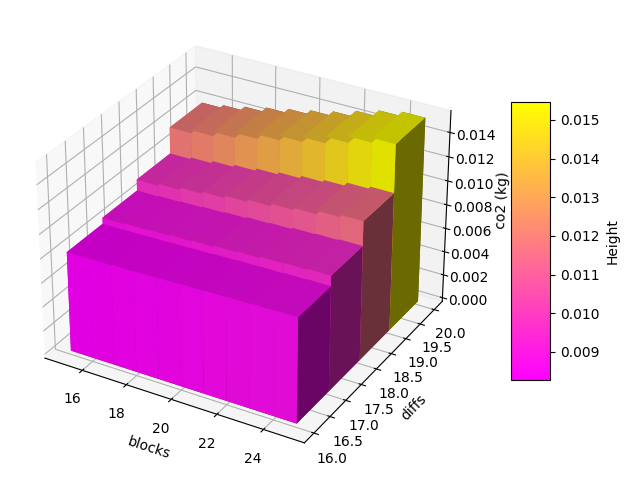

In [52]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Set up the grid in x and y
x_pos = df['blocks']
y_pos = df['diffs']
z_pos = np.zeros_like(x_pos)

# Set up the bar heights based on z data
w = 1
dx = np.ones_like(z_pos) * w  # Width of the bars in the x direction
dy = np.ones_like(z_pos) * w  # Width of the bars in the y direction
dz = df['co2']  # The height of the bars

# Normalize dz values for coloring
norm = plt.Normalize(dz.min(), dz.max())
colors = cm.spring(norm(dz))  # Using the spring colormap which goes from pink (low) to yellow (high)

# Creating the bar plot
ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color=colors)

# Creating a color bar
mappable = cm.ScalarMappable(norm=norm, cmap=cm.spring)
mappable.set_array(dz)
plt.colorbar(mappable, shrink=0.6, aspect=7, label='Height')

ax.set_xlabel('blocks')
ax.set_ylabel('diffs')
ax.set_zlabel('co2 (kg)')

plt.show()